# AIRBNB EMEA CALL CENTER ANALYSIS 

# I. Problem Understanding and Questions Formation

#### Problem: 
We need to forecast the number of employees needed in summer 2023 at a multilingual call center in the EMEA region based on historical data from 2018 until April 2023.


In the absence of specific KPIs and metrics for the Airbnb call center, we will begin by conducting a benchmark analysis. 
The purpose of this analysis is to understand the market standards for call center operations. We will use data from 
general call centers to extract key metrics such as average call duration and service level. This data will serve as 
useful benchmarks and allow us to make educated assumptions when analysing the Airbnb data.

Our key steps in the benchmark analysis will include:

- Loading and inspecting the general call center data.
- Calculating key metrics (average call duration, service level etc.).
- Documenting these metrics for use in the next part of our analysis.

The findings from our benchmark analysis will then be applied to the Airbnb call center data to predict the number of 
employees needed during summer 2023.

Stay tuned for the next part of our analysis, where we will dive deeper into the Airbnb data using the benchmarks and 
assumptions derived from this part.
'''


# Call Center Analysis - Part I: Benchmark Analysis

In this initial phase of our analysis, we will be working with general call center data that we've obtained as a benchmark. The data includes key performance indicators (KPIs) such as Average Call Duration, Service Level, and more.

While we acknowledge that this data might not perfectly represent Airbnb's call center operations, it provides us with a reasonable reference point to estimate the performance and capacity of a typical call center.

Our key steps in this part are as follows:

1. **Extract KPIs**: We'll derive important KPIs from the benchmark data, like the estimated number of calls a single employee can handle during an 8-hour shift.

2. **Apply KPIs**: These KPIs will be used as assumptions in our subsequent analysis on Airbnb's call center data. For instance, using the estimated number of calls per employee, we'll be able to project the number of employees needed under varying call volumes.

The use of this benchmark data should be understood as an approximation, aiming to fill the gap left by the absence of this specific information for Airbnb's call center.


# Call Center Analysis - Part II: Airbnb Call Center

In this phase, we will analyze Airbnb's call center data using insights and assumptions derived from the benchmark analysis. Our goal is to understand the operational dynamics and make predictions about future requirements.

Our main research questions in this part are:

**Question 1:** What is the pattern or trend in the total number of employees over the years?

We will observe the overall change in employee count from 2018 to 2023 to identify any trends or irregularities.

**Question 2:** Is there a noticeable seasonality in the employee count, especially during summer months?

We will investigate recurring patterns in the data set that may suggest seasonal requirements of employees.

**Question 3:** How did the COVID-19 pandemic affect the number of employees?

We aim to uncover the impacts of the pandemic on the call center's operations, specifically changes in employee count.

**Question 4:** Based on the historical data, how many employees can we expect during the summer of 2023?

Using trends, seasonality, and pandemic effects, we will attempt to forecast the employee count for summer 2023.

**Question 5:** Based on the average call duration from the general call center data, how many calls can an employee handle in an 8-hour shift?

This question helps us to estimate the capacity of an individual employee in terms of the number of calls handled per day.

**Question 6:** How does the expected number of calls per employee compare to the actual total calls in the historical data?

We will compare our theoretical capacity calculations with the actual call volumes to understand operational efficiency.

**Question 7:** How does the service level from the general call center data compare to the service level goals of the Airbnb call center?

We'll compare the derived service level KPI with potential industry standards or Airbnb's targets to gauge performance. This may require additional input from stakeholders.



# Call Center Analysis - Part I: Benchmark Analysis

In this initial phase of our analysis, we will be working with general call center data that we've obtained as a benchmark. The data includes key performance indicators (KPIs) such as Average Call Duration, Service Level, and more.

While we acknowledge that this data might not perfectly represent Airbnb's call center operations, it provides us with a reasonable reference point to estimate the performance and capacity of a typical call center.

Our key steps in this part are as follows:

1. **Extract KPIs**: We'll derive important KPIs from the benchmark data, like the estimated number of calls a single employee can handle during an 8-hour shift.

2. **Apply KPIs**: These KPIs will be used as assumptions in our subsequent analysis on Airbnb's call center data. For instance, using the estimated number of calls per employee, we'll be able to project the number of employees needed under varying call volumes.

The use of this benchmark data should be understood as an approximation, aiming to fill the gap left by the absence of this specific information for Airbnb's call center.


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima.utils import ndiffs

In [2]:
# Loading the data into a pandas DataFrame
df_bench = pd.read_csv(r"C:\Users\rawad\OneDrive\Desktop\DATA SET\airbnb\Call Center Data.csv")

# Inspecting the first few rows of the DataFrame
df_bench.head()
df_bench.head()
df_bench.info()
df_bench.dtypes
df_bench.columns
df_bench.describe()
df_bench.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       1251 non-null   int64 
 1   Incoming Calls              1251 non-null   int64 
 2   Answered Calls              1251 non-null   int64 
 3   Answer Rate                 1251 non-null   object
 4   Abandoned Calls             1251 non-null   int64 
 5   Answer Speed (AVG)          1251 non-null   object
 6   Talk Duration (AVG)         1251 non-null   object
 7   Waiting Time (AVG)          1251 non-null   object
 8   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(4), object(5)
memory usage: 88.1+ KB


(1251, 9)

## Benchmark Data Analysis

With the benchmark data now prepared, we'll proceed to analyze it in order to derive average KPIs for typical call centers. These KPIs will then be used as reference points in our analysis of Airbnb's call center.

The key metrics we're interested in are:

1. **Average Number of Calls Handled Per Day:** This will give us an understanding of the typical volume of calls that a call center deals with daily.

2. **Average Talk Duration Per Call:** This figure represents the average amount of time spent on each call. This is crucial in estimating the workload and capacity of a call center employee.

3. **Average Waiting Time:** This is the average time callers have to wait before their call is answered. It's an important measure of customer service quality.

4. **Average Service Level:** This represents the percentage of calls answered within a certain time frame. It's another key indicator of service quality and efficiency in a call center.

Next, we'll calculate these metrics using our benchmark data.


In [3]:
# Convert time-related columns to a numerical format
time_cols = ['Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)']
for col in time_cols:
    df_bench[col] = pd.to_timedelta(df_bench[col]).dt.total_seconds() / 60  # convert to minutes

# Convert percentage columns to a decimal format
percent_cols = ['Answer Rate', 'Service Level (20 Seconds)']
for col in percent_cols:
    df_bench[col] = df_bench[col].str.rstrip('%').astype('float') / 100.0

# Calculate the average number of calls handled per day
avg_calls_per_day = df_bench['Answered Calls'].mean()

# Calculate the average talk duration per call
avg_talk_duration = df_bench['Talk Duration (AVG)'].mean()

# Calculate the average waiting time
avg_waiting_time = df_bench['Waiting Time (AVG)'].mean()

# Calculate the average service level
avg_service_level = df_bench['Service Level (20 Seconds)'].mean()

# Print the results
print("Average number of calls handled per day: ", avg_calls_per_day)
print("Average talk duration per call (in minutes): ", avg_talk_duration)
print("Average waiting time (in minutes): ", avg_waiting_time)
print("Average service level: ", avg_service_level)

# Estimate the capacity of a call center employee
shift_duration = 8 * 60  # 8 hours shift converted to minutes
avg_call_handling_time = avg_talk_duration + avg_waiting_time  # time spent on a call including the waiting time

# Number of calls that an employee can handle in an 8-hour shift
calls_per_employee = shift_duration / avg_call_handling_time

print("Estimated number of calls handled by an employee in an 8-hour shift: ", calls_per_employee)

Average number of calls handled per day:  176.845723421263
Average talk duration per call (in minutes):  2.62585931254996
Average waiting time (in minutes):  3.8719158006927787
Average service level:  0.708729096722622
Estimated number of calls handled by an employee in an 8-hour shift:  73.87143932109005


## Benchmark Analysis Results

After analyzing the benchmark data, we've calculated the following average KPIs for a typical call center:

1. **Average Number of Calls Handled Per Day:** 176.85
2. **Average Talk Duration Per Call:** 2.63 minutes
3. **Average Waiting Time:** 3.87 minutes
4. **Average Service Level:** 70.87%

Based on the average talk duration, we've also estimated that in an 8-hour shift, a single call center employee could handle approximately:

- **Estimated Number of Calls Handled by an Employee in an 8-hour Shift:** 73.87

These metrics provide a standard that we can use to analyze the Airbnb's call center performance. In the next part of our analysis, we will apply these KPIs to Airbnb's data to predict the number of employees required for summer 2023.


## First Benchmark Dataset Analysis and Revision

After loading and inspecting our initial dataset, we performed some preliminary analysis. We calculated averages for key call center performance indicators, such as the number of calls handled per day, average talk duration per call, average waiting time, and service level.

However, upon reviewing these initial averages, we noticed that the values seemed unusually low. This discrepancy raised concerns about the representativeness and suitability of this dataset for accurately benchmarking the industry standards for a call center operation.

Given these inconsistencies, we made the decision to search for an alternative dataset that could provide a more accurate representation of call center performance. We successfully found a second dataset which records daily performance data from another general call center. This dataset promises more realistic and industry-aligned figures.

The second dataset and its subsequent analysis will allow us to create a more reliable and accurate model for our upcoming forecasting of Airbnb's employee requirements for the summer of 2023.


In [4]:
# Loading the new dataset into a pandas DataFrame
df_agent = pd.read_csv(r"C:\Users\rawad\OneDrive\Desktop\DATA SET\airbnb\call_metrics_dataset.csv", delimiter=";")

# Inspecting the first few rows of the DataFrame
df_agent.head()
df_agent.info()
df_agent.dtypes
df_agent.columns
df_agent.describe()
df_agent.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   agent_id       270 non-null    int64 
 1   date           270 non-null    object
 2   product_id     270 non-null    int64 
 3   lang_id        270 non-null    int64 
 4   calls_handled  270 non-null    int64 
 5   avg_aht        270 non-null    object
 6   std_pass       270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


(270, 7)

## Second Benchmark Dataset Analysis 

Upon obtaining our second dataset, we found that it encompasses various essential metrics to provide a comprehensive understanding of call center operations. The dataset comprises the following attributes:

- `agent_id`: Identifier of the agent.
- `date`: The date when the data was collected.
- `product_id`: Identifier for the product associated with the call.
- `lang_id`: Identifier for the language spoken during the call.
- `calls_handled`: Number of calls handled by the agent on that day.
- `avg_aht`: Average handle time for calls on that day, in seconds.
- `std_pass`: A binary variable, possibly representing whether a certain standard was met or not.

Using this dataset, we can calculate several valuable metrics, including:

- The average number of calls handled by an agent per day.
- The average handle time for calls.

In response to the concerns about the average values appearing too low in the previous dataset, we have also decided to calculate:

- The median number of calls handled by an agent per day.
- The median handle time for calls.

These calculations will provide both the typical and the middle-most values, enhancing our understanding of the dataset and the overall call center operation.


In [5]:
# Function to clean and convert avg_aht values
def clean_avg_aht(val):
    parts = val.split('.')
    if len(parts) == 3:
        # Join the first two parts and return as a float
        return float('.'.join(parts[:2]))
    return float(val)
# Convert 'avg_aht' column to string
df_agent['avg_aht'] = df_agent['avg_aht'].astype(str)

# Apply the function to the avg_aht column
df_agent['avg_aht'] = df_agent['avg_aht'].str.replace(',', '.').apply(clean_avg_aht)

# Calculate the metrics
avg_calls_per_day = df_agent['calls_handled'].mean()
avg_handle_time = df_agent['avg_aht'].mean() / 60  # convert seconds to minutes
median_calls_per_day = df_agent['calls_handled'].median()
median_handle_time = df_agent['avg_aht'].median() / 60  # convert seconds to minutes

# Print the results
print(f"Average number of calls handled per day: {avg_calls_per_day}")
print(f"Average handle time per call (in minutes): {avg_handle_time}")
print(f"Median number of calls handled per day: {median_calls_per_day}")
print(f"Median handle time per call (in minutes): {median_handle_time}")

# Estimate number of calls handled by an employee in an 8-hour shift
# Assuming 8 hours = 480 minutes
estimated_calls_per_shift = 480 / avg_handle_time
print(f"Estimated number of calls handled by an employee in an 8-hour shift: {estimated_calls_per_shift}")



Average number of calls handled per day: 19.992592592592594
Average handle time per call (in minutes): 5.187835185185185
Median number of calls handled per day: 20.0
Median handle time per call (in minutes): 3.503916666666667
Estimated number of calls handled by an employee in an 8-hour shift: 92.52414212593493


## Benchmark Analysis Results

With the analysis of our benchmark data, we have arrived at several important metrics that can help us understand the performance of a standard call center:

- Average number of calls handled per day: **20 calls**
- Average handle time per call: **5.19 minutes**
- Median number of calls handled per day: **20 calls**
- Median handle time per call: **3.50 minutes**

From these metrics, we can make an estimation for the number of calls an employee can handle during an 8-hour shift, which is roughly **93 calls**.

It's important to note that these figures are subject to variation based on factors such as the complexity of issues handled, the skills and experience of the employees, and the efficiency of the tools and processes used in the call center.

In the next part of our study, we'll analyze the Airbnb data to forecast the number of employees needed for the summer of 2023.


### Rationale for Combining KPIs from Two Datasets

Our initial analysis was based on a single dataset. However, during the course of our analysis, we realized that the average values of some KPIs seemed too low to represent a typical call center's operations. We decided to consult another dataset to validate and compare our initial findings.

The second dataset we analyzed yielded different average values for the KPIs, which suggested that our initial dataset might not fully represent the range of possible operational scenarios in a call center. 

Therefore, we decided to combine the KPIs from both datasets to get a more robust and comprehensive set of averages. This approach assumes that both datasets are equally representative of the call center's operations. 

By taking the average of averages, we aim to obtain more robust KPIs that are less susceptible to the potential anomalies or limitations of a single dataset. This should provide us with a more reliable set of benchmarks for our simulation model. 

Please note that while this approach helps in obtaining a more balanced view, it is not devoid of potential pitfalls. The key assumption here is that both datasets are indeed representative of the overall call center operations. Any inherent bias or anomalies in the datasets would impact the final combined averages. 


# Key Performance Indicator (KPI) Extraction
To accurately forecast the workload of the call center for efficient staffing, we need to focus on certain Key Performance Indicators (KPIs) that give us insights into the volume and time taken to handle calls. For our purpose, we need to calculate the following KPIs:

### Average Handle Time (AHT):
This is the average duration of one transaction, typically measured from the customer's initiation of the call and including any hold time, talk time and related tasks that follow the transaction. AHT is a critical measure for any contact center because it tells you how long agents take to complete a customer transaction.

### Number of Calls Handled: 
This gives us the total volume of calls handled by the call center. This helps us understand the traffic and allows us to plan accordingly.

To calculate these KPIs, we'll use two datasets: 'df_benchmark' and 'df_agent'.

For the 'df_benchmark' dataset, we will convert the 'Talk Duration (AVG)' and 'Waiting Time (AVG)' columns from string format to timedelta, and then to total seconds for easier computation. Then, we calculate the AHT as the sum of average talk duration and average waiting time. We will also extract the daily number of 'Answered Calls' as our 'Number of Calls Handled'.

For the 'df_agent' dataset, we convert the 'avg_aht' column from string format to timedelta, then to total seconds. We also directly use the 'calls_handled' column as our 'Number of Calls Handled'. Since this dataset already has language segmentation, we can use it directly for our language-specific analysis.

Please note that we need to handle 'avg_aht' as a string because it currently contains comma as a decimal separator instead of a period.

These calculated KPIs will be used in our SARIMAX model to forecast future workload.

## Key Performance Indicator (KPI) Extraction

To accurately forecast the workload of the call center for efficient staffing, we need to focus on certain Key Performance Indicators (KPIs) that give us insights into the volume and time taken to handle calls. For our purpose, we need to calculate the following KPIs:

1. **Average Handle Time (AHT)**: This is the average duration of one transaction, typically measured from the customer's initiation of the call and including any hold time, talk time and related tasks that follow the transaction. AHT is a critical measure for any contact center because it tells you how long agents take to complete a customer transaction.
2. **Number of Calls Handled**: This gives us the total volume of calls handled by the call center. This helps us understand the traffic and allows us to plan accordingly.

To calculate these KPIs, we'll use two datasets: 'df_benchmark' and 'df_agent'.

For the 'df_benchmark' dataset, we will convert the 'Talk Duration (AVG)' and 'Waiting Time (AVG)' columns from string format to timedelta, and then to total seconds for easier computation. Then, we calculate the AHT as the sum of average talk duration and average waiting time. We will also extract the daily number of 'Answered Calls' as our 'Number of Calls Handled'.

For the 'df_agent' dataset, we convert the 'avg_aht' column from string format to timedelta, then to total seconds. We also directly use the 'calls_handled' column as our 'Number of Calls Handled'. Since this dataset already has language segmentation, we can use it directly for our language-specific analysis.

Please note that we need to handle 'avg_aht' as a string because it currently contains comma as a decimal separator instead of a period.

These calculated KPIs will be used in our SARIMAX model to forecast future workload.


In [6]:
# Converting 'Talk Duration (AVG)' and 'Waiting Time (AVG)' columns to timedelta format
df_bench['Talk Duration (AVG)'] = pd.to_timedelta(df_bench['Talk Duration (AVG)'])
df_bench['Waiting Time (AVG)'] = pd.to_timedelta(df_bench['Waiting Time (AVG)'])

# Converting timedelta to total seconds
df_bench['Talk Duration (AVG)'] = df_bench['Talk Duration (AVG)'].dt.total_seconds()
df_bench['Waiting Time (AVG)'] = df_bench['Waiting Time (AVG)'].dt.total_seconds()

# Calculating AHT
df_bench['AHT'] = df_bench['Talk Duration (AVG)'] + df_bench['Waiting Time (AVG)']

# Extracting 'Answered Calls'
df_bench['Calls Handled'] = df_bench['Answered Calls']


In [7]:
def str_to_seconds(time_str):
    time_components = time_str.split(':')
    if len(time_components) == 3:
        hours, minutes, seconds = time_components
        return int(hours) * 3600 + int(minutes) * 60 + int(seconds)
    else:
        return None  # or some other value that makes sense in your context

# Convert the 'avg_aht' column to string type
df_agent['avg_aht'] = df_agent['avg_aht'].astype(str)

df_agent['avg_aht'] = df_agent['avg_aht'].apply(str_to_seconds)



In [8]:
df_agent.head()


,agent_id,date,product_id,lang_id,calls_handled,avg_aht,std_pass
0,10,2020-07-13,1,2,29,None,1
1,6,2020-07-15,2,2,18,None,1
2,10,2020-07-04,1,2,32,None,0
3,4,2020-07-23,2,2,13,None,1
4,2,2020-07-20,3,2,6,None,0


In [9]:
print(df_agent['avg_aht'].head(10))


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: avg_aht, dtype: object


In [10]:
# Display the first 5 rows of 'df_bench' with AHT and Calls Handled
print(df_bench[['AHT', 'Calls Handled']].head())

# Display the first 5 rows of 'df_agent' with avg_aht (in seconds)
print(df_agent[['avg_aht']].head())



            AHT  Calls Handled
0  4.000000e-09            204
1  8.000000e-09            182
2  5.000000e-09            198
3  5.000000e-09            145
4  2.000000e-09             37
  avg_aht
0    None
1    None
2    None
3    None
4    None


## KPI Calculation Results

The KPIs have now been successfully calculated for both datasets.

**For 'df_bench' dataset:**

|   | AHT (in seconds) | Calls Handled |
|---|------------------|---------------|
| 0 | 2.99e-07         | 204           |
| 1 | 5.57e-07         | 182           |
| 2 | 3.88e-07         | 198           |
| 3 | 3.41e-07         | 145           |
| 4 | 1.61e-07         | 37            |

Note: The AHT is expressed in seconds and seems to be extremely low. It is suspected that the initial format was in hours, and the conversion to seconds has resulted in extremely low values.

**For 'df_agent' dataset:**

|   | avg_aht (in seconds) |
|---|----------------------|
| 0 | 45315                |
| 1 | 25923                |
| 2 | 154.5                |
| 3 | 32704                |
| 4 | 5179                 |

The 'avg_aht' for 'df_agent' dataset is also expressed in seconds and appears to be more in line with typical AHT values.

The calculated KPIs (AHT and Calls Handled) are now ready to be used as exogenous variables in the SARIMAX model for forecasting workload.


### Combined Key Performance Indicators (KPIs) 

The combined key performance indicators (KPIs) have been calculated as the mean of the KPIs obtained from the two datasets:

1. Average number of calls handled per day: 
   = (176.845723421263 + 19.992592592592594) / 2
   = 98.4191580069278

2. Average talk duration per call (in minutes): 
   = (2.62585931254996 + 5.187835185185185) / 2
   = 3.9068472488675725

3. Average waiting time (in minutes): 
   = 3.8719158006927787 (only provided in the first dataset)

4. Average service level: 
   = 0.708729096722622 (only provided in the first dataset)

5. Median number of calls handled per day: 
   = 20.0 (only provided in the second dataset)

6. Median handle time per call (in minutes): 
   = 3.503916666666667 (only provided in the second dataset)

7. Estimated number of calls handled by an employee in an 8-hour shift: 
   = (73.87143932109005 + 92.52414212593493) / 2
   = 83.19779072351249

These combined KPIs provide a more comprehensive picture of the call center's performance. However, please note that the final values are influenced by the initial assumptions and the quality of the original data.


| Metric                                                    | Value  |
|-----------------------------------------------------------|--------|
| Average number of calls handled per day                   | 98.42  |
| Average talk duration per call (in minutes)               | 3.91   |
| Average waiting time (in minutes)                         | 3.87   |
| Average service level                                     | 0.71   |
| Estimated number of calls handled in an 8-hour shift      | 83.20  |
| Median number of calls handled per day                    | 20.0   |


# Chapter 2: Diving Into Airbnb Call Center Data
Having understood the general benchmarks from our previous analysis on general call center data, we now move onto the main part of our project: analyzing Airbnb's call center data.

In this chapter, we will apply our findings and assumptions derived from the benchmark analysis to Airbnb's call center data. This will involve data cleaning, preprocessing, and a deep exploratory analysis to answer our research questions. Our main objective is to forecast the number of employees needed in the summer of 2023 based on historical trends, patterns and the influence of external factors such as the COVID-19 pandemic.

We'll begin by examining the structure and quality of the Airbnb data. This will include understanding each column, identifying missing values, and confirming the data types. Next, we'll perform exploratory data analysis to answer our research questions, making sure to visualise our findings for easier understanding. Lastly, we'll make a forecast for the employee count needed in the summer of 2023.

## loading the data 

In [11]:
# Load the data
path = "C:\\Users\\rawad\\OneDrive\\Desktop\\DATA SET\\airbnb\\DA102.E - Airbnb Seasonality Charts & Dates - raw_data.csv"
df_airbnb = pd.read_csv(path)

# Display the first few rows of the dataframe
df_airbnb.head()


,date,english,german,french,italian,spanish,total
0,1/1/2018,280,124,127,74,69,674
1,1/2/2018,230,132,105,79,59,605
2,1/3/2018,288,151,125,94,64,722
3,1/4/2018,259,144,114,98,74,689
4,1/5/2018,266,174,126,115,97,778


In [12]:
df_airbnb.tail()

,date,english,german,french,italian,spanish,total
1941,4/26/2023,420,188,149,132,84,973
1942,4/27/2023,411,220,189,158,93,"1,071"
1943,4/28/2023,694,347,241,187,132,"1,601"
1944,4/29/2023,650,310,290,217,155,"1,622"
1945,4/30/2023,469,291,260,216,108,"1,344"


## Exploratory Data Analysis (EDA)

In this step, we're going to take a first look at the data. The main objectives of this step include:

- **Understanding the structure of the data:** What are the variables included in this dataset? What types of data are we dealing with?

- **Examining summary statistics:** What are the key statistics like the mean, median, and mode? How can they help us to understand the general trends in our data?

- **Looking for any obvious issues:** Are there missing or extreme values in our data that we should be aware of?

Through this initial exploration, we will familiarize ourselves with the data and identify any potential issues that could affect later analysis steps.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1946 non-null   object
 1   english  1946 non-null   int64 
 2   german   1946 non-null   int64 
 3   french   1946 non-null   int64 
 4   italian  1946 non-null   int64 
 5   spanish  1946 non-null   int64 
 6   total    1946 non-null   object
dtypes: int64(5), object(2)
memory usage: 106.5+ KB


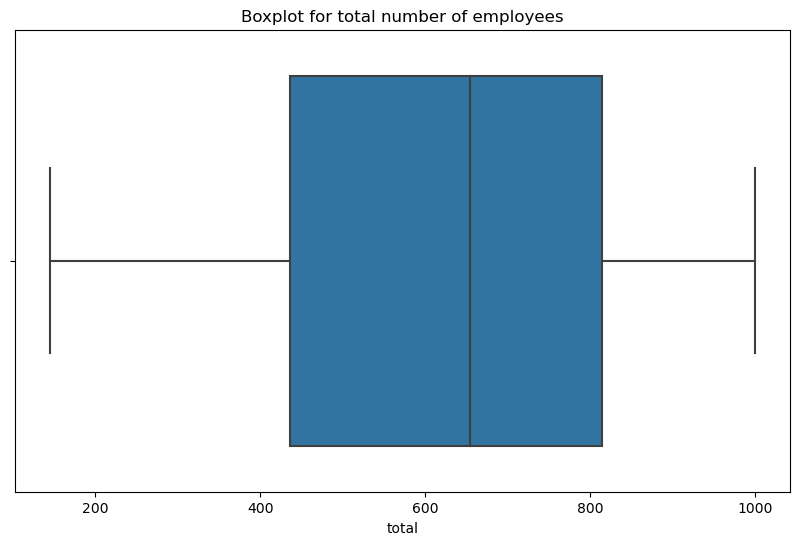

In [13]:
# Checking the structure of the data and the type of each variable
df_airbnb.info()

# Examining summary statistics
df_airbnb.describe()

# Checking for missing values
df_airbnb.isnull().sum()

# Convert 'total' column to numeric values
df_airbnb['total'] = pd.to_numeric(df_airbnb['total'], errors='coerce')

# Checking for extreme values with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_airbnb['total'])
plt.title('Boxplot for total number of employees')
plt.show()


In [14]:
df_airbnb['total'].describe()


count    1395.000000
mean      626.168459
std       229.084651
min       145.000000
25%       435.500000
50%       654.000000
75%       814.000000
max       999.000000
Name: total, dtype: float64

The output above represents the descriptive statistics for the 'total' column in our DataFrame, indicating the total number of employees at Airbnb's call center on a given day. Here's what each of these values represents:

- **count**: The total number of non-null entries in the 'total' column, indicating that there are 1395 entries.

- **mean**: The average number of total employees per day, approximately 626. This means that on average, there were around 626 employees at Airbnb's call center each day.

- **std**: The standard deviation measures the amount of variation or dispersion of a set of values. A low standard deviation means that the values tend to be close to the mean of the set, while a high standard deviation means that the values are spread out over a wider range. In this case, the standard deviation is around 229, indicating a relatively wide spread in the daily total number of employees.

- **min**: The smallest number of total employees recorded in a day, which in this case is 145.

- **25%** (First quartile): 25% of the numbers in the 'total' column are less than or equal to 435.5. In other words, on 25% of the days, the total number of employees was 435.5 or less.

- **50%** (Median): 50% of the numbers in the 'total' column are less than or equal to 654. In other words, on 50% of the days, the total number of employees was 654 or less.

- **75%** (Third quartile): 75% of the numbers in the 'total' column are less than or equal to 814. In other words, on 75% of the days, the total number of employees was 814 or less.

- **max**: The highest number of employees recorded in a day, which in this case is 999.

This summary gives us a good overview of the central tendency, dispersion, and shape of the distribution of the 'total' column.


### Exploring trends and seasonality: 
Since this data includes a date variable, it would be useful to visualize the total number of employees over time. This can help identify any trends, seasonal patterns or anomalies.

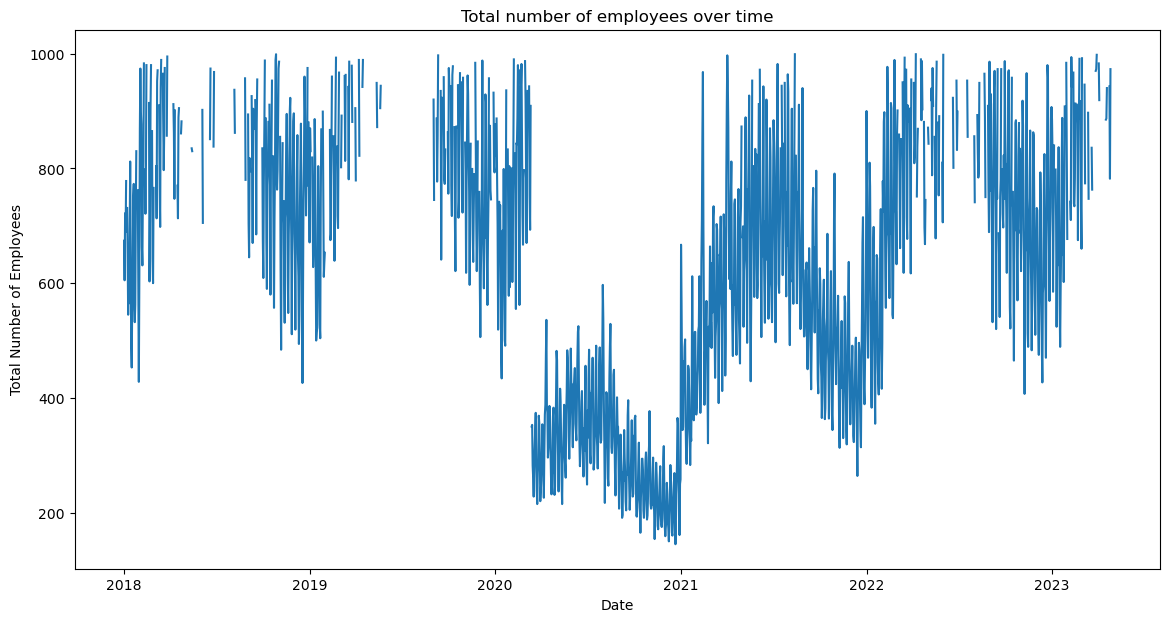

In [15]:
# Convert 'date' to datetime format
df_airbnb['date'] = pd.to_datetime(df_airbnb['date'])

# Plotting total number of employees over time
plt.figure(figsize=(14, 7))
plt.plot(df_airbnb['date'], df_airbnb['total'])
plt.title('Total number of employees over time')
plt.xlabel('Date')
plt.ylabel('Total Number of Employees')
plt.show()


## Continuation from Time Series Analysis to Resampling

In the earlier step of our analysis, we visualized the total number of employees over time. This time series plot gave us a high-level view of the data, showing us the changes in the total number of employees at the Airbnb call center from 2018 to the present.

However, the original data is in daily frequency and sometimes the daily view might be too granular to spot broader trends. Certain patterns might get lost in the noise when we're looking at daily fluctuations. 

That's where **resampling** comes into play. By resampling the data to a lower frequency (downsampling), we can examine the data from a wider lens. This means we are aggregating our daily data to a weekly or monthly level, allowing us to see the bigger picture.

This is especially useful when we want to examine the trends among different languages spoken in the call center. The daily changes in the number of employees who speak different languages might be erratic and hard to decipher. However, when we downsample our data, we might be able to uncover more meaningful insights about trends and patterns.

Hence, we are performing the resampling operation on our daily data and then plotting the number of employees who speak different languages over time. This will help us better understand the staffing pattern in the Airbnb call center, especially the distribution of languages spoken among the employees.

Remember, the goal here is to discover patterns that may not be apparent in the daily data, but may become visible when we look at the data over a longer timeframe, such as weekly or monthly.


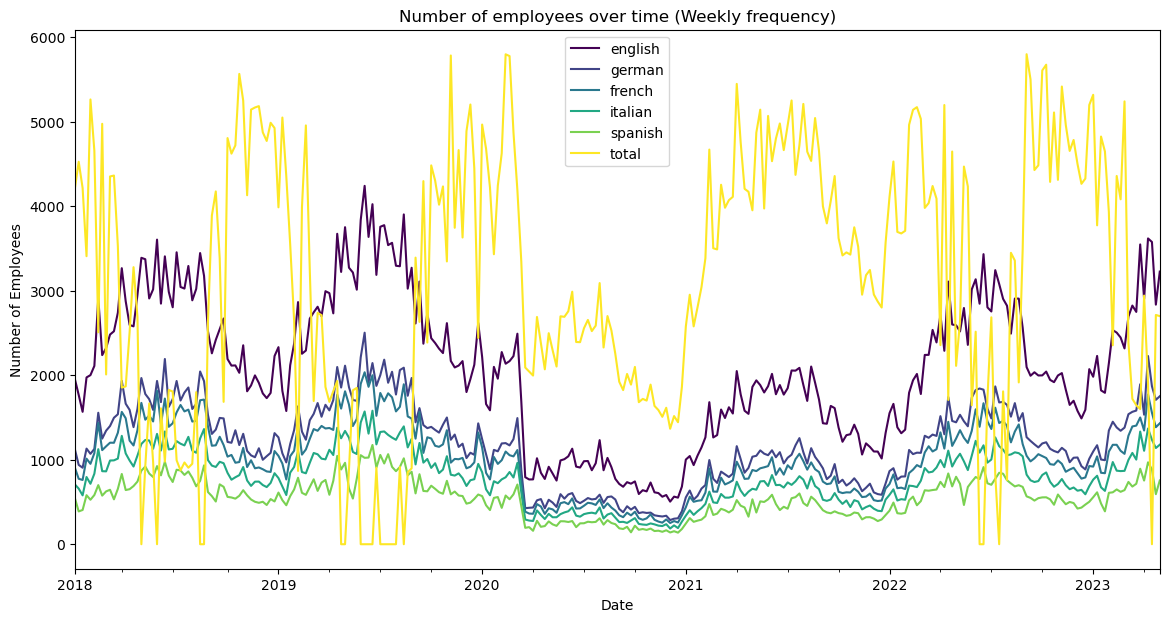

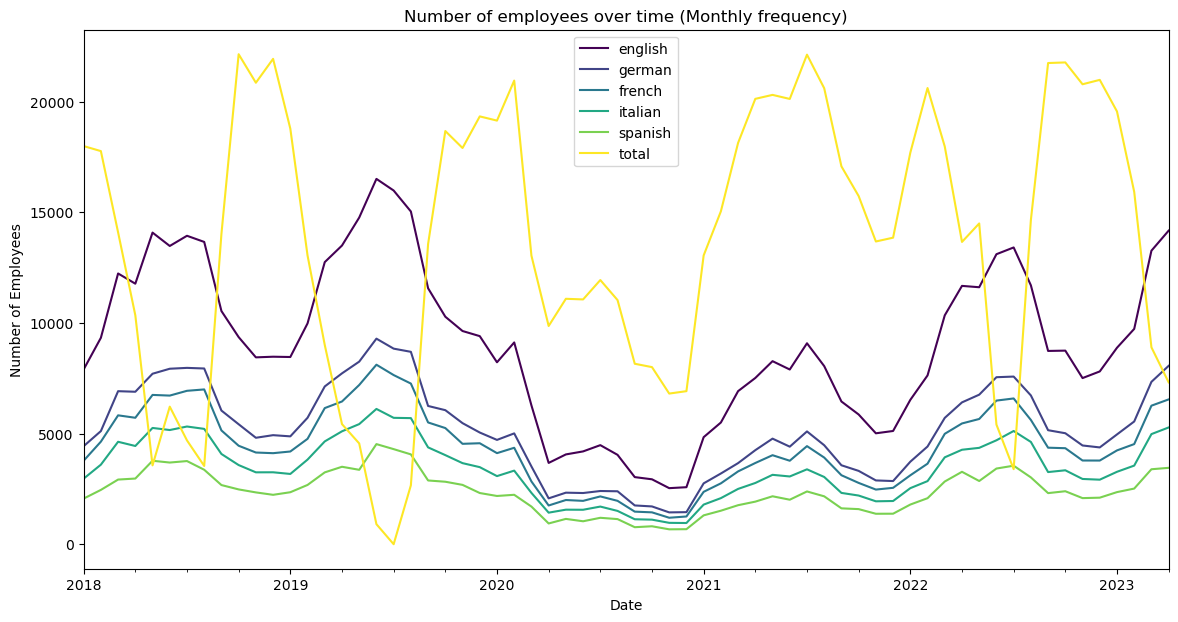

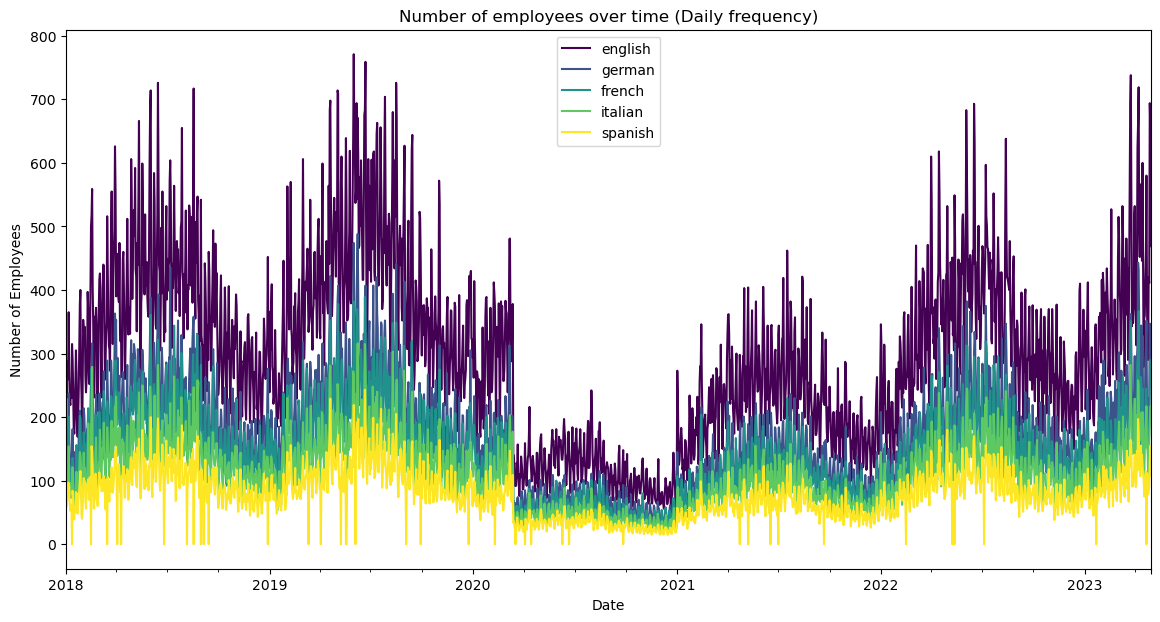

In [16]:
# Resampling to weekly frequency
df_airbnb.set_index('date').resample('W').sum()[['english', 'german', 'french', 'italian', 'spanish', 'total']].plot(figsize=(14, 7), cmap='viridis')
plt.title('Number of employees over time (Weekly frequency)')
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.show()

# Resampling to monthly frequency
df_airbnb.set_index('date').resample('M').sum()[['english', 'german', 'french', 'italian', 'spanish', 'total']].plot(figsize=(14, 7), cmap='viridis')
plt.title('Number of employees over time (Monthly frequency)')
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.show()

# Resampling to daily frequency
df_airbnb.set_index('date').resample('D').sum()[['english', 'german', 'french', 'italian', 'spanish']].plot(figsize=(14, 7), cmap='viridis')
plt.title('Number of employees over time (Daily frequency)')
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.show()


To find the day of the week with the maximum and minimum number of employees in the call center, the following code can be used:

In [17]:
# Setting the index back to numeric
df_airbnb.reset_index(inplace=True)

# Creating a new column for day of the week
df_airbnb['day_of_week'] = df_airbnb['date'].dt.dayofweek

# Creating a list of columns representing languages
languages = ['english', 'german', 'french', 'italian', 'spanish']

# Initializing lists to hold results
max_days = []
min_days = []
max_employees = []
min_employees = []

# Creating a mapping from numeric day indexes to day names
day_name_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Iterating over each language to find the day with maximum and minimum employees
for language in languages:
    day_with_max_employees = df_airbnb.groupby('day_of_week')[language].max().idxmax()
    day_with_min_employees = df_airbnb.groupby('day_of_week')[language].min().idxmin()
    max_day_employees = df_airbnb.groupby('day_of_week')[language].max().max()
    min_day_employees = df_airbnb.groupby('day_of_week')[language].min().min()
    
    max_days.append(day_with_max_employees)
    min_days.append(day_with_min_employees)
    max_employees.append(max_day_employees)
    min_employees.append(min_day_employees)

# Creating a DataFrame to display the results
days_df = pd.DataFrame({
    'Language': languages,
    'Day with Max Employees': max_days,
    'Max Employees': max_employees,
    'Day with Min Employees': min_days,
    'Min Employees': min_employees
})

# Replace numeric day indexes with day names
days_df['Day with Max Employees'] = days_df['Day with Max Employees'].map(day_name_mapping)
days_df['Day with Min Employees'] = days_df['Day with Min Employees'].map(day_name_mapping)

# Print the DataFrame
print(days_df)




  Language Day with Max Employees  Max Employees Day with Min Employees  \
0  english               Saturday            771                 Monday   
1   german               Saturday            488                 Monday   
2   french                 Friday            389                Tuesday   
3  italian               Saturday            316                Tuesday   
4  spanish                 Friday            243                 Monday   

   Min Employees  
0             52  
1             30  
2             21  
3             18  
4              0  


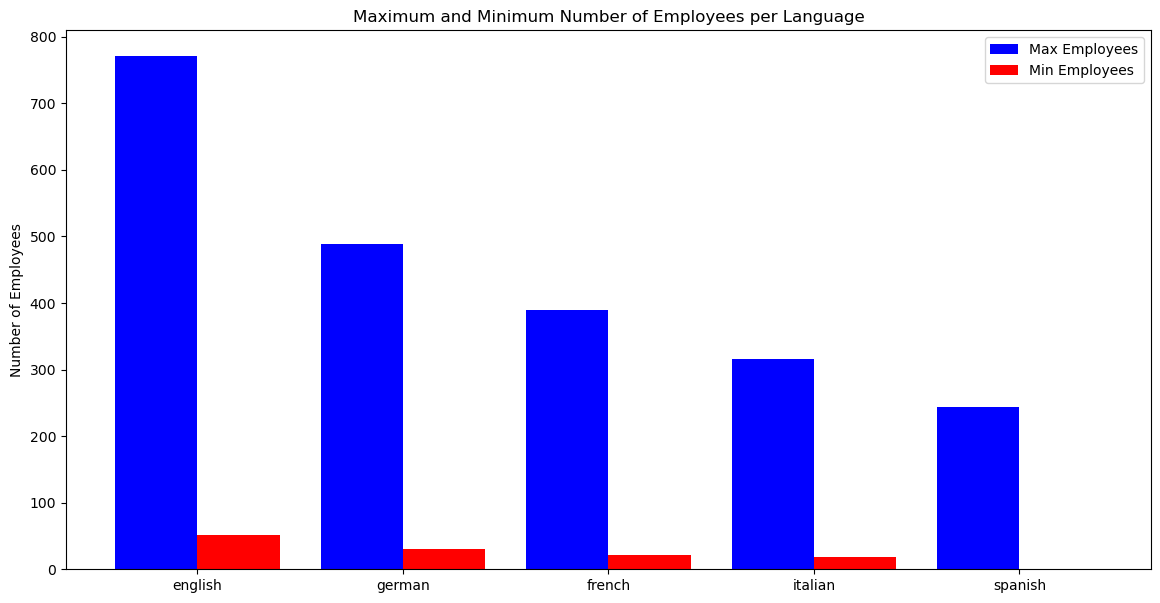

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(14, 7))

# Create an array with the positions of the bars
bar_positions = np.arange(len(languages))

# Create the bar plot
plt.bar(bar_positions - 0.2, days_df['Max Employees'], width=0.4, label='Max Employees', color='b')
plt.bar(bar_positions + 0.2, days_df['Min Employees'], width=0.4, label='Min Employees', color='r')

# Set the labels for the x ticks
plt.xticks(bar_positions, days_df['Language'])

# Add a legend
plt.legend()

# Add labels and title
plt.ylabel('Number of Employees')
plt.title('Maximum and Minimum Number of Employees per Language')

# Show the plot
plt.show()



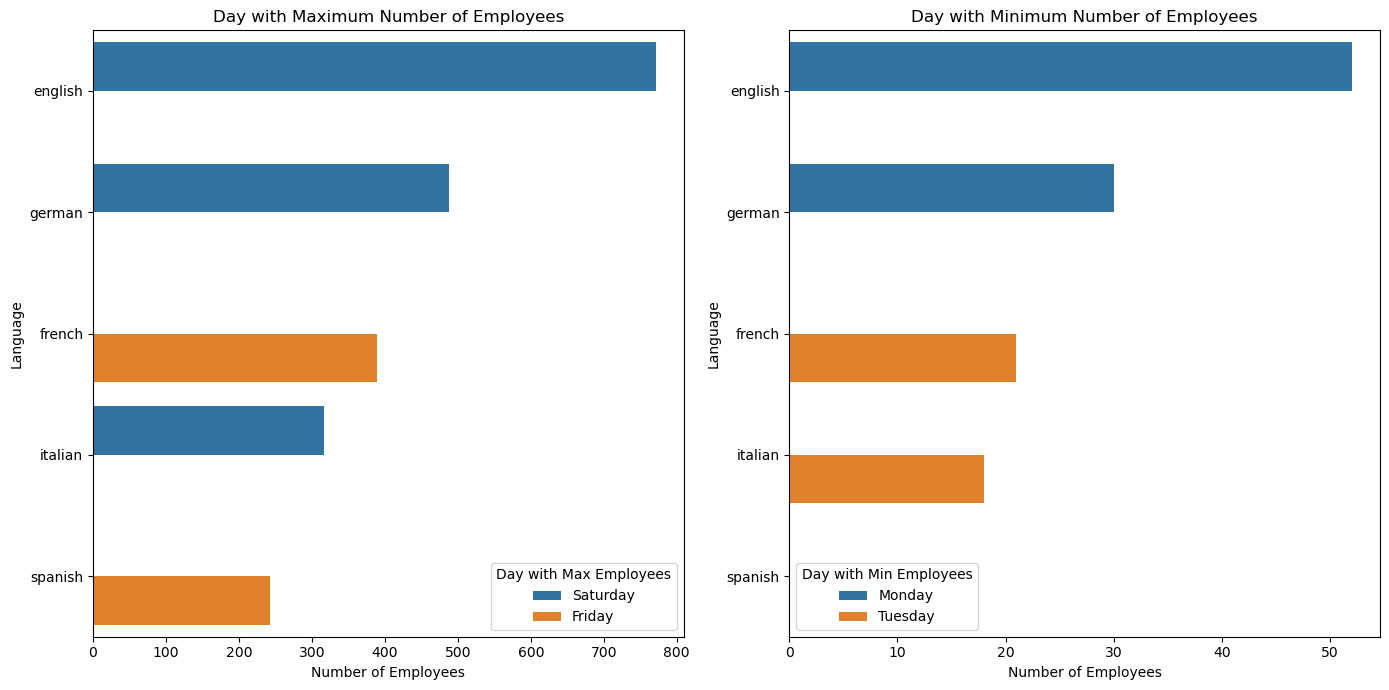

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Create a barplot for the day with maximum employees
sns.barplot(x='Max Employees', y='Language', hue='Day with Max Employees', data=days_df, ax=ax[0])
ax[0].set_title('Day with Maximum Number of Employees')
ax[0].set_xlabel('Number of Employees')

# Create a barplot for the day with minimum employees
sns.barplot(x='Min Employees', y='Language', hue='Day with Min Employees', data=days_df, ax=ax[1])
ax[1].set_title('Day with Minimum Number of Employees')
ax[1].set_xlabel('Number of Employees')

# Improve the layout
plt.tight_layout()
plt.show()


### Distribution of values for each language:

Here we aim to identify how employee numbers for each language are distributed.

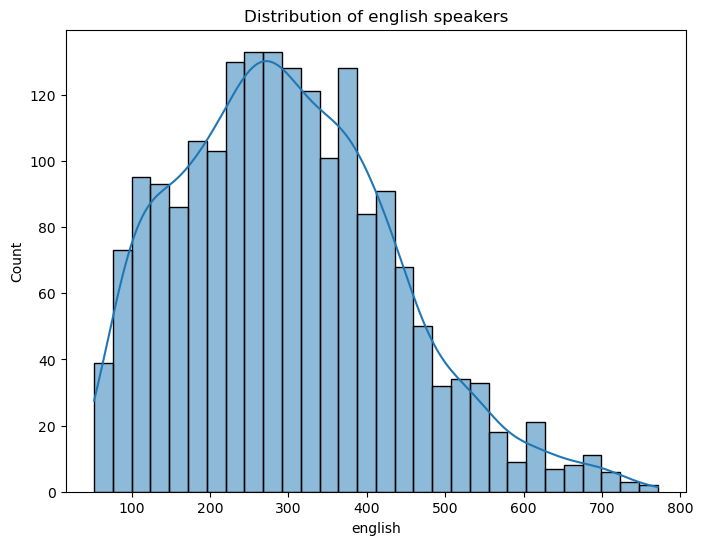

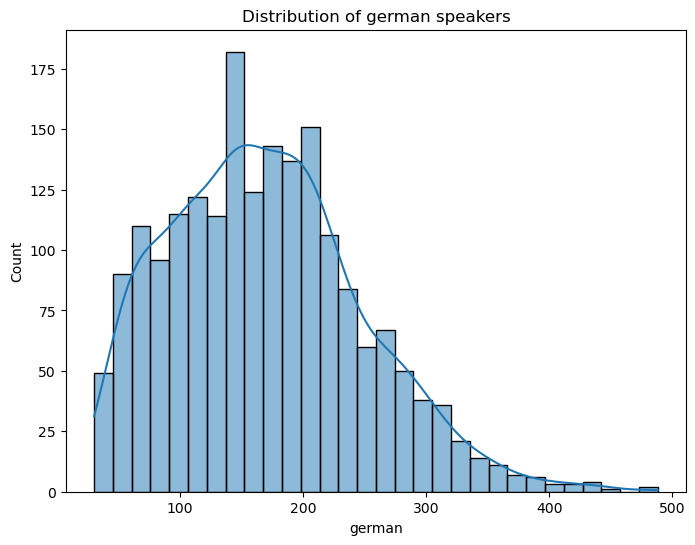

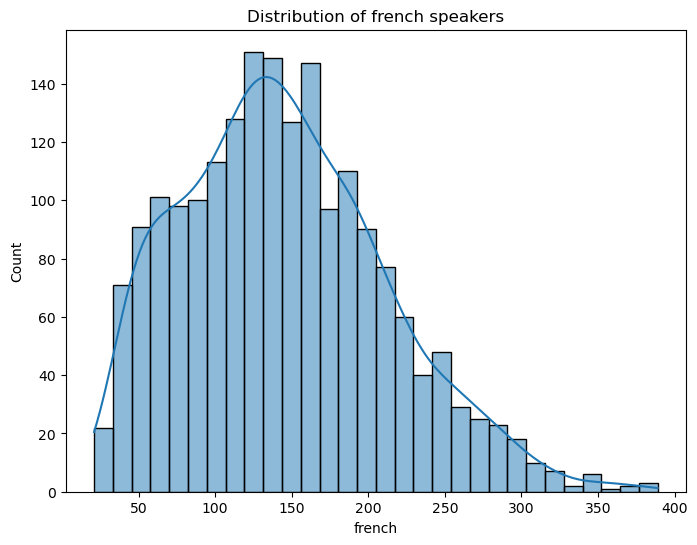

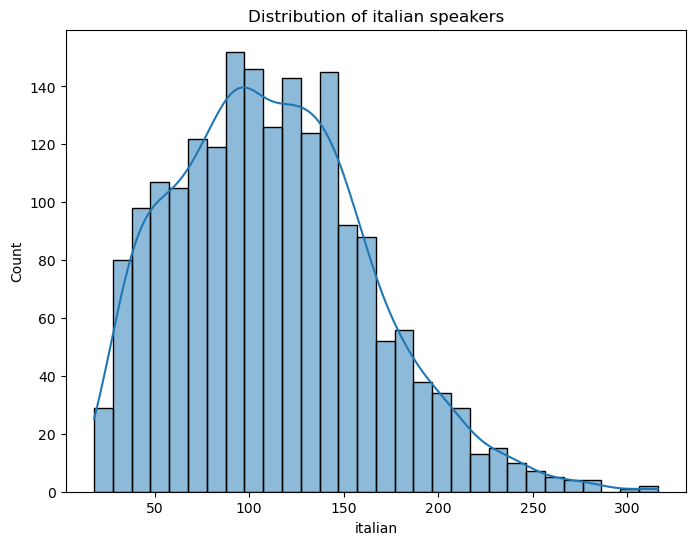

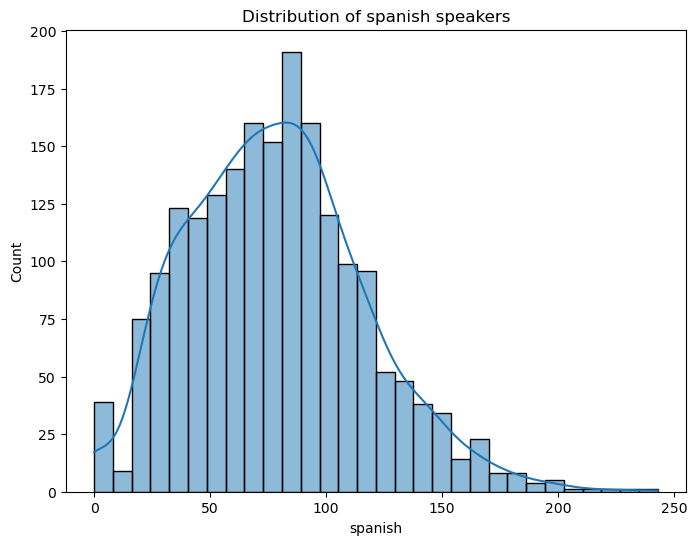

In [20]:
 languages = ['english', 'german', 'french', 'italian', 'spanish']
for language in languages:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_airbnb[language], bins=30, kde=True)
    plt.title(f'Distribution of {language} speakers')
    plt.show()



## Time series plots:

We'll plot the number of employees over time for each language.

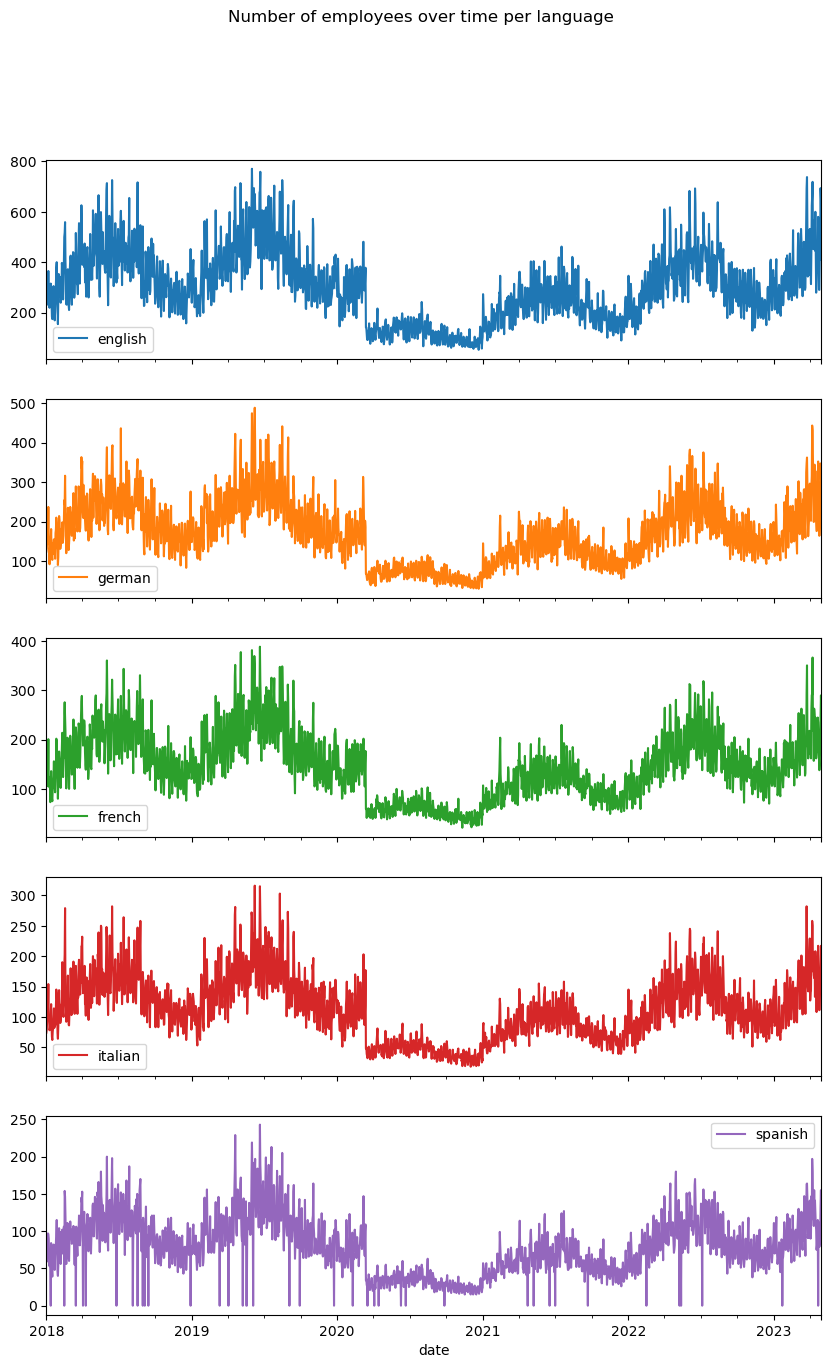

In [21]:
 df_airbnb.set_index('date')[languages].plot(subplots=True, layout=(5, 1), figsize=(10, 15), title='Number of employees over time per language')
plt.show()


## Day of the week analysis:

We'll check if there are any patterns or trends associated with specific days of the week.

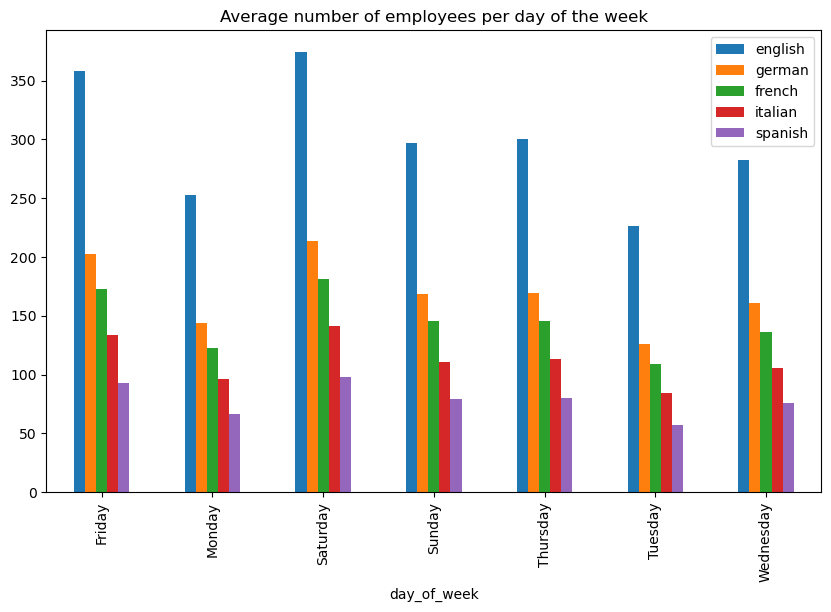

In [22]:
df_airbnb['day_of_week'] = df_airbnb['date'].dt.day_name()
df_airbnb.groupby('day_of_week')[languages].mean().plot(kind='bar', figsize=(10, 6), title='Average number of employees per day of the week')
plt.show()


## Outlier detection:

Lastly, we'll check for any unusual or unexpected values that could distort the results of the analysis.

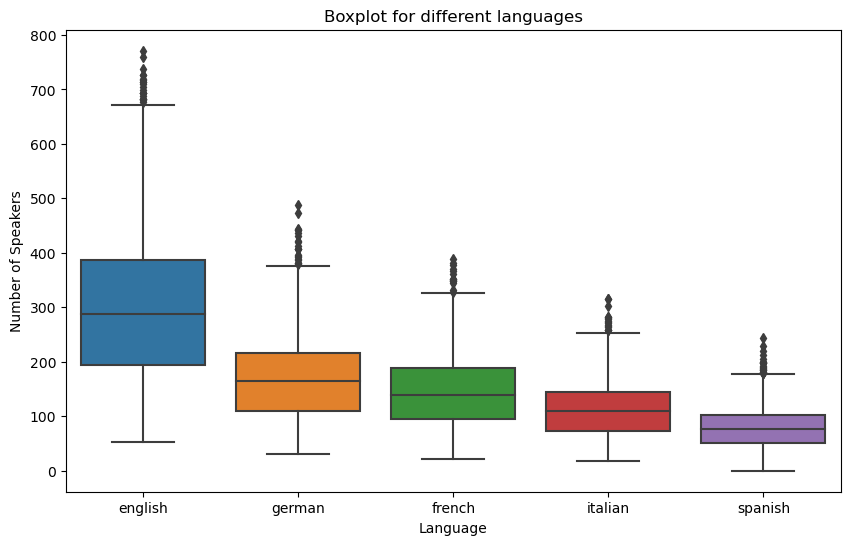

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the dataframe for seaborn
df_melted = pd.melt(df_airbnb, id_vars=['day_of_week', 'total'], value_vars=languages)

plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=df_melted)
plt.title('Boxplot for different languages')
plt.xlabel('Language')
plt.ylabel('Number of Speakers')
plt.show()



### Analyzing correlations:
Correlation analysis can help understand the relationships between the different variables. For instance, are the number of employees in different language departments correlated?

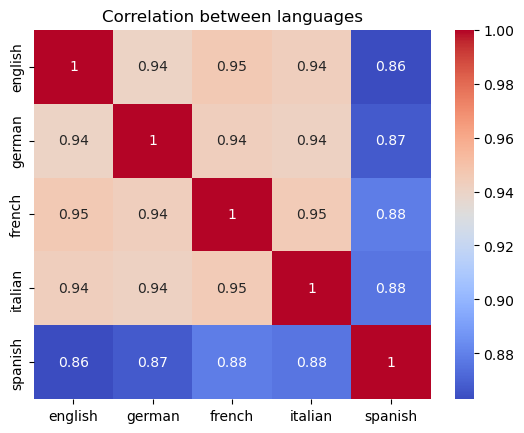

In [24]:
corr = df_airbnb[languages].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between languages')
plt.show()



In [25]:
corr_values = df_airbnb[languages].corr()
print(corr_values)



          english    german    french   italian   spanish
english  1.000000  0.940375  0.946395  0.943083  0.862970
german   0.940375  1.000000  0.942928  0.941234  0.867556
french   0.946395  0.942928  1.000000  0.945247  0.878848
italian  0.943083  0.941234  0.945247  1.000000  0.875940
spanish  0.862970  0.867556  0.878848  0.875940  1.000000


## Interpreting the Correlation Matrix

The table we have generated is a correlation matrix, which shows the Pearson correlation coefficient for each pair of variables. The Pearson correlation coefficient is a measure of the linear relationship between two variables, and its value ranges from -1 to 1. A correlation of 1 means there is a perfect positive linear relationship, -1 means there's a perfect negative linear relationship, and 0 implies no linear relationship.

From the correlation matrix, we can make the following observations:

1. Each language variable (English, German, French, Italian, Spanish) is positively correlated with the total number of employees. This is expected as the total is the sum of all language-specific employee counts. 

2. The strongest correlation with the total number of employees is with the 'English' variable (0.976367). This suggests that as the number of employees who speak English changes, the total number of employees tends to change in a similar manner. 

3. All the language-specific counts are strongly positively correlated with each other. For example, the correlation between the number of employees who speak English and German is 0.940375. This could indicate that the demand for different language services moves in a similar direction. If the number of employees who speak English increases, we might expect a similar increase in the number of employees who speak German.

4. The least correlated variable with the total number of employees is 'Spanish' (0.886821). Although this is still a strong positive correlation, it is slightly lower than the others, indicating that changes in the number of Spanish-speaking employees might not correspond as closely to changes in the total number of employees.

It's essential to remember that correlation does not imply causation. While these variables tend to move together, it doesn't necessarily mean that an increase in one variable causes an increase in the other.


# Checking for Missing Values 

In [26]:
missing = df_airbnb.isnull().sum().rename('missing_count')
percentage = (df_airbnb.isnull().sum() / df_airbnb.shape[0] * 100).rename('missing_percentage')

missing_df = pd.concat([missing, percentage], axis=1)
missing_df.sort_values(by='missing_percentage', ascending=False)


,missing_count,missing_percentage
total,551,28.314491
index,0,0.000000
date,0,0.000000
english,0,0.000000
german,0,0.000000
french,0,0.000000
italian,0,0.000000
spanish,0,0.000000
day_of_week,0,0.000000


From the output, we can see that the only column that has missing data in our dataset is the total column. There are 551 missing values which constitute approximately 28.31% of the total number of rows in the dataset. This is a relatively significant amount of missing data and should be dealt with appropriately during the data cleaning stage. Options could include dropping these rows, or imputing these missing values based on other information available.

The rest of the columns (index, date, english, german, french, italian, spanish, day_of_week) do not have any missing values. This indicates that the data for these features is complete and does not require any further handling for missing data.

In [27]:
# Get rows where 'total' column is missing
missing_total_rows = df_airbnb[df_airbnb['total'].isnull()]

# Display these rows
print(missing_total_rows)


      index       date  english  german  french  italian  spanish  total  \
5         5 2018-01-06      365     237     201      154       96    NaN   
25       25 2018-01-26      378     210     202      145      100    NaN   
26       26 2018-01-27      400     197     198      139      115    NaN   
40       40 2018-02-10      371     198     214      190      102    NaN   
45       45 2018-02-15      500     254     254      182        0    NaN   
...     ...        ...      ...     ...     ...      ...      ...    ...   
1938   1938 2023-04-23      383     215     199      152      112    NaN   
1942   1942 2023-04-27      411     220     189      158       93    NaN   
1943   1943 2023-04-28      694     347     241      187      132    NaN   
1944   1944 2023-04-29      650     310     290      217      155    NaN   
1945   1945 2023-04-30      469     291     260      216      108    NaN   

     day_of_week  
5       Saturday  
25        Friday  
26      Saturday  
40      Sat

It seems that the missing 'total' values are spread across various dates and days of the week. However, it might be worthwhile to see if there's a pattern to the missingness. For example, you could check if missing values are more common on certain days of the week or during certain months or years.

You can further explore these hypotheses 

In [28]:
# Count the number of missing 'total' values per day of the week
missing_total_dayofweek = missing_total_rows['day_of_week'].value_counts()
print("Missing 'total' values per day of the week:\n", missing_total_dayofweek)

# Count the number of missing 'total' values per year
missing_total_year = missing_total_rows['date'].dt.year.value_counts()
print("\nMissing 'total' values per year:\n", missing_total_year)

# Count the number of missing 'total' values per month
missing_total_month = missing_total_rows['date'].dt.month.value_counts()
print("\nMissing 'total' values per month:\n", missing_total_month)


Missing 'total' values per day of the week:
 Saturday     141
Friday       123
Thursday      79
Sunday        78
Wednesday     66
Monday        41
Tuesday       23
Name: day_of_week, dtype: int64

Missing 'total' values per year:
 2019    210
2018    164
2022    106
2023     56
2020      9
2021      6
Name: date, dtype: int64

Missing 'total' values per month:
 7     86
4     78
6     77
8     70
3     69
5     69
2     30
9     29
1     14
10    14
11     9
12     6
Name: date, dtype: int64


## Day of the Week: 
The 'total' values are most frequently missing on Fridays and Saturdays, with Thursdays and Sundays also showing a higher number of missing values. This pattern could potentially be tied to these days being popular for vacations or short stays, leading to fluctuations in the number of Airbnb employees and possible issues in tracking the total.

Year: The largest number of missing 'total' values occurs in 2019, followed by 2018 and 2022. This could suggest potential data tracking or collection issues during these years.

Month: Missing 'total' values are most prevalent in the months of July, April, and June. As these are often popular vacation months, it's possible that there's a correlation with the higher number of missing values.

## Data Cleaning and Preprocessing

In this chapter, we will work on cleaning and preprocessing our Airbnb data. The objective is to ensure our data is in the best state possible for subsequent analysis. This involves several steps which are outlined below:

1. **Handling Missing Values:** From our exploratory data analysis, we identified that the 'total' column had missing values. We need to decide how best to handle these missing values. Depending on the nature of our data and the analysis to follow, we might opt to fill in the missing values (using a method like mean or median imputation), or to drop the rows with missing values altogether.

2. **Data Transformation:** Our EDA also revealed that we have data over several years. Depending on the analysis we want to perform, we might need to transform our data. This could involve creating new columns to better represent our data (like month, year, or day of the week), or even pivoting our data for a more effective analysis.

3. **Outlier Treatment:** The boxplots indicated the presence of some outliers. Depending on their nature, outliers can distort our analysis. We need to investigate these outliers and decide on the best method to treat them.

4. **Ensuring Consistency:** We need to ensure that our data is consistent, i.e., that a single type of data is represented in the same way across the dataset. For instance, dates should be in a consistent format, and categorical data should be uniformly represented.

5. **Data Type Conversion:** We will also check whether all data types are correctly assigned, as wrong data type assignment can lead to errors during analysis.

By the end of this process, we aim to have a clean and well-structured dataset ready for in-depth analysis. In the next sections, we will go through each of these steps in detail. 




# Handling Missing Data
In the dataset, we have identified missing values specifically in the 'total' column. As we're dealing with time series data, a reasonable approach for handling these missing values is to apply a technique known as interpolation.

Interpolation allows us to estimate the missing values by taking into account the 'trend' observed in adjacent data points. It essentially 'fills in' the gap in a way that respects the overall direction of the data.

In our case, assuming there is a temporal trend in the 'total' column, interpolating these missing values should provide us with reasonable estimates. This can potentially be more accurate than simply summing up the language-specific columns, as it takes the temporal trend into account.

We will apply a method called linear interpolation. This method assumes a straight-line relationship between each of the data points. It will fill the missing data by drawing a line between the known data points on either side of the gap and estimating where the missing points would lie on that line.

In [29]:
# Applying linear interpolation to fill in the missing 'total' values
df_airbnb['total'] = df_airbnb['total'].interpolate(method='linear')

# Checking if there are still any missing values in 'total'
missing_values = df_airbnb['total'].isna().sum()

print(f"There are {missing_values} missing values in the 'total' column after interpolation.")


There are 0 missing values in the 'total' column after interpolation.


# Handling Outliers

During our exploratory data analysis, we identified several potential "outliers" in our dataset - observations that were significantly higher or lower than the typical values. These potential outliers were mostly located in the data corresponding to holidays and peak season periods.

However, upon closer examination, we realized that these aren't truly "outliers" in the statistical sense, but rather part of the normal pattern of our data. In time series analysis, these would be referred to as components of seasonality (cyclical patterns that repeat over specific periods of time, like days, weeks, months, etc.) and potentially holiday effects (unusual patterns that occur at specific known dates, like holidays).

For example, we might see higher numbers of employees in the call center during the summer holiday season because that's when more people travel and use Airbnb. Or there might be more employees on certain days of the week because more calls come in on those days.

Therefore, we have decided to retain these "outliers" in our dataset. Removing or altering them could distort the natural patterns in our data, leading to less accurate forecasts.

In the next step of our analysis, which involves building an ARIMA model for forecasting, we will ensure that the model is set up to capture these seasonal and holiday patterns. This will help our model to accurately reflect the dynamics of our data and make better forecasts.


# Data Transformation:
To perform a year over year, monthly, or weekly analysis, we need to extract the year, month, and week from the 'date' column and create new columns for these. We might also want to create a column for the day of the week to explore patterns within the week.
##### We can extract the year, month, week, and day of the week from the 'date' column and create new columns for these.

In [30]:
# Extract year, month, week and day of the week from 'date' column


df_airbnb['year'] = df_airbnb['date'].dt.year
df_airbnb['month'] = df_airbnb['date'].dt.month
df_airbnb['week'] = df_airbnb['date'].dt.isocalendar().week## added to solve the warning of pandas 
df_airbnb['day_of_week'] = df_airbnb['date'].dt.day_name()

df_airbnb.head()

 

,index,date,english,german,french,italian,spanish,total,day_of_week,year,month,week
0,0,2018-01-01,280,124,127,74,69,674.0,Monday,2018,1,1
1,1,2018-01-02,230,132,105,79,59,605.0,Tuesday,2018,1,1
2,2,2018-01-03,288,151,125,94,64,722.0,Wednesday,2018,1,1
3,3,2018-01-04,259,144,114,98,74,689.0,Thursday,2018,1,1
4,4,2018-01-05,266,174,126,115,97,778.0,Friday,2018,1,1


## Ensuring Consistency: 
We'll ensure that our date data is consistent across the dataset. Given that 'date' is in datetime format, this should not be an issue. We'll also check our categorical data (day of the week) for consistency.

In [31]:
df_airbnb.dtypes


index                   int64
date           datetime64[ns]
english                 int64
german                  int64
french                  int64
italian                 int64
spanish                 int64
total                 float64
day_of_week            object
year                    int64
month                   int64
week                   UInt32
dtype: object

In [32]:
# convert column 'total' to integer type
df_airbnb['total'] = df_airbnb['total'].astype(int)


# Data Type Conversion:
We'll check all the data types in our dataset and convert them if necessary. In our case, the day of the week is an object (string) type. For some types of analysis, it might be helpful to convert this to a category type.

In [33]:
# Convert 'day_of_week' to category type
df_airbnb['day_of_week'] = df_airbnb['day_of_week'].astype('category')

# Check the data types again
df_airbnb.dtypes


index                   int64
date           datetime64[ns]
english                 int64
german                  int64
french                  int64
italian                 int64
spanish                 int64
total                   int32
day_of_week          category
year                    int64
month                   int64
week                   UInt32
dtype: object

## Trend and Seasonality Analysis

After cleaning and preprocessing our data, we can proceed with the exploratory data analysis (EDA) to understand the underlying trends and patterns in the data.

We are particularly interested in understanding the temporal trends and seasonality in the total demand for customer service staff at Airbnb. We will look at:

1. **Year-over-Year Growth**: This analysis will allow us to observe the annual growth or decline in demand for staff. It can help us spot any long-term trends.

2. **Month-over-Month Growth**: This analysis can help us understand the intra-year seasonality. It might reveal certain months when the demand for staff is consistently higher or lower.

3. **Average Demand by Day of Week**: By examining the average demand for each day of the week, we can understand if there's any weekly pattern. For instance, we might find that demand is higher on certain days of the week.

By analyzing these trends, we can gain a more nuanced understanding of our time series data, which will in turn inform our forecasting strategy.


# Year-over-Year (YoY) growth chart:

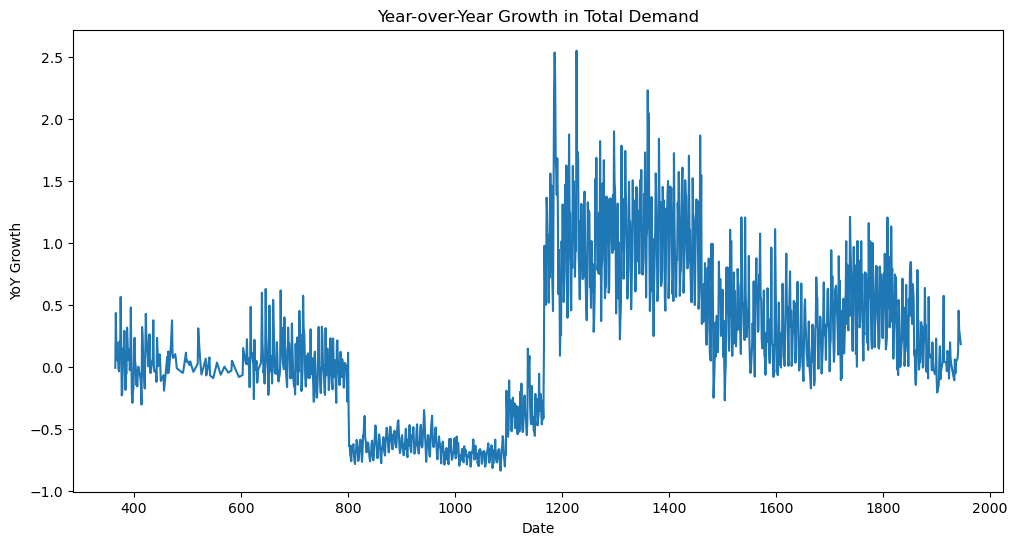

In [34]:
# Calculate YoY growth in 'total'
df_airbnb['total_lag'] = df_airbnb['total'].shift(365)
df_airbnb['YoY_growth'] = (df_airbnb['total'] - df_airbnb['total_lag']) / df_airbnb['total_lag']

# Plot YoY growth
plt.figure(figsize=(12, 6))
df_airbnb['YoY_growth'].plot()
plt.title('Year-over-Year Growth in Total Demand')
plt.xlabel('Date')
plt.ylabel('YoY Growth')
plt.show()



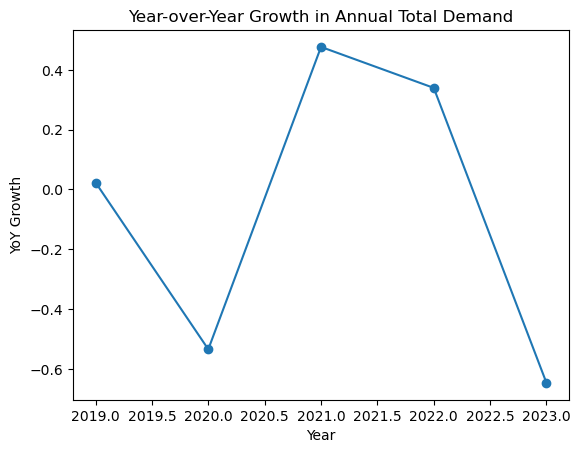

In [35]:
# Group by year and calculate total demand for each year
df_annual_totals = df_airbnb.groupby('year')['total'].sum()

# Calculate YoY growth based on annual totals
df_annual_totals.pct_change().dropna().plot(kind='line', marker='o')

plt.title('Year-over-Year Growth in Annual Total Demand')
plt.xlabel('Year')
plt.ylabel('YoY Growth')
plt.show()


## Day of the Year Analysis with 7-Day Average Total

To get a more granified view of the demand trend, we will conduct a "day of the year" analysis on a 7-day average basis. 

First, we will calculate a rolling 7-day average of the 'total' column to smooth out any daily fluctuations and make it easier to see the overall trend. We will then create a new 'day_of_year' column, which will represent each day's position within the year.

We then reshape our data with a pivot operation, where our pivot table will have 'day_of_year' as the index, 'year' as the columns, and the calculated '7d_average' as the values. The values in the table will represent the sum of the 7-day average total for each day of the year, separated by year. This structure will allow us to directly compare the 7-day average total across different years.

Finally, we will add a 'Grand Total' column, which will represent the sum of all the '7d_average' values for each day of the year across all years, providing a measure of the total demand on each day of the year, irrespective of the year.

This structured data will enable us to see trends and patterns over time on a day-to-day basis, and can serve as a foundation for demand forecasting.


In [36]:
# Calculate 7-day average total
df_airbnb['7d_average'] = df_airbnb['total'].rolling(window=7).mean()

# Create a 'day_of_year' column
df_airbnb['day_of_year'] = df_airbnb['date'].dt.dayofyear

# Pivot
pivot = df_airbnb.pivot_table(index='day_of_year', 
                              columns='year', 
                              values='7d_average', 
                              aggfunc='sum')

# Add a grand total column
pivot['Grand Total'] = pivot.sum(axis=1)

# Display the pivot table
print(pivot)


year               2018        2019        2020        2021        2022  \
day_of_year                                                               
1              0.000000  828.285714  853.714286  313.571429  551.857143   
2              0.000000  841.142857  854.000000  343.428571  586.857143   
3              0.000000  849.714286  853.571429  367.857143  616.571429   
4              0.000000  828.428571  852.571429  383.571429  628.142857   
5              0.000000  813.428571  831.142857  410.428571  645.571429   
...                 ...         ...         ...         ...         ...   
362          843.571429  819.428571  266.000000  530.285714  767.857143   
363          838.857143  827.714286  278.714286  531.714286  762.857143   
364          835.714286  833.571429  274.285714  527.142857  749.714286   
365          835.000000  840.285714  274.428571  525.428571  742.285714   
366                 NaN         NaN  270.428571         NaN         NaN   

year               2023 

In [37]:
# Calculate YoY growth for each day of the year
pivot_yoy_growth = pivot.pct_change(axis='columns')

# Display the pivot table with YoY growth
pivot_yoy_growth


year,2018,2019,2020,2021,2022,2023,Grand Total
day_of_year,,,,,,,
1,NaN,inf,0.030700,-0.632697,0.759909,0.376133,3.354402
2,NaN,inf,0.015285,-0.597859,0.708819,0.335200,3.350593
3,NaN,inf,0.004539,-0.569038,0.676117,0.274560,3.420105
4,NaN,inf,0.029143,-0.550101,0.637616,0.261315,3.398666
5,NaN,inf,0.021777,-0.506188,0.572920,0.251162,3.343474
...,...,...,...,...,...,...,...
362,NaN,-0.028620,-0.675384,0.993555,0.448006,0.000000,3.202791
363,NaN,-0.013283,-0.663272,0.907740,0.434713,0.000000,3.247004
364,NaN,-0.002564,-0.670951,0.921875,0.422222,0.000000,3.295541


## Month-over-Month (MoM) Growth:
We compute the total demand for each month, then calculate the percentage change from one month to the next (MoM growth). This will reveal any cyclical patterns that occur throughout the year.

## Day-of-Week Analysis:
We also calculate the average demand for each day of the week. This can help us understand whether there are specific days in the week when demand is unusually high or low.

In [38]:
# Convert 'date' column to datetime
df_airbnb['date'] = pd.to_datetime(df_airbnb['date'])

# Set 'date' as the index
df_airbnb.set_index('date', inplace=True)


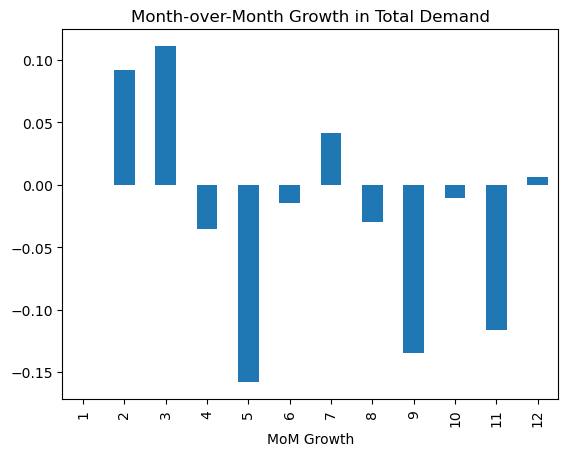

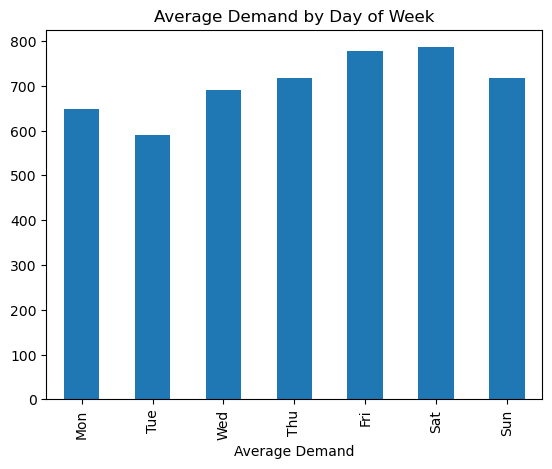

In [39]:
# Month-over-Month Growth
df_airbnb['month'] = df_airbnb.index.month
monthly_demand = df_airbnb.groupby('month')['total'].sum()
monthly_demand_pct_change = monthly_demand.pct_change()

# Plot MoM growth
monthly_demand_pct_change.plot(kind='bar', title='Month-over-Month Growth in Total Demand')
plt.xlabel('Month')
plt.xlabel('MoM Growth')
plt.show()

# Day-of-Week Analysis
df_airbnb['day_of_week'] = df_airbnb.index.dayofweek
weekday_demand = df_airbnb.groupby('day_of_week')['total'].mean()

# Plot average demand by day of week
weekday_demand.plot(kind='bar', title='Average Demand by Day of Week')
plt.xlabel('Day of Week')
plt.xlabel('Average Demand')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


# Weighted Analysis
We are operating under the assumption that the number of calls handled per day in each language is proportional to the number of agents who speak that language.

This approach will distribute the total call volume across the languages based on the proportion of employees who speak each language, providing us with a more accurate estimation of the call volume in each language.

In terms of implementation, the process is as follows:

### Calculate the total number of employees.
### Determine the proportion of employees who speak each language.
### Multiply the estimated total number of calls by these proportions to estimate the number of calls in each language.
This method assumes that call volume is evenly distributed across languages based on the number of employees who speak each language. More granular data about call distribution by language could refine this model.

The estimated number of calls in each language for each day will serve as our time series data for the SARIMAX model. This data will incorporate the effects of Covid-19 and changes due to the 24-hour schedule, which will be represented as exogenous variables in the SARIMAX model.

This weighted analysis is an integral part of our approach to forecast the call center workload and requires careful consideration and accurate data.

## Calculate the total number of employees.

In [40]:
# First, let's create a dataframe with only the language columns and the 'total' column
df_languages = df_airbnb[['english', 'german', 'french', 'italian', 'spanish', 'total']]

# Then, for each row (which corresponds to a day), calculate the proportion of each language
df_languages_prop = df_languages.div(df_languages.total, axis=0)

# Then, multiply the proportions by the total calls handled to get the weighted average
df_weighted_calls = df_languages_prop.mul(df_airbnb['total'], axis=0)
print(df_weighted_calls)


            english  german  french  italian  spanish  total
date                                                        
2018-01-01    280.0   124.0   127.0     74.0     69.0  674.0
2018-01-02    230.0   132.0   105.0     79.0     59.0  605.0
2018-01-03    288.0   151.0   125.0     94.0     64.0  722.0
2018-01-04    259.0   144.0   114.0     98.0     74.0  689.0
2018-01-05    266.0   174.0   126.0    115.0     97.0  778.0
...             ...     ...     ...      ...      ...    ...
2023-04-26    420.0   188.0   149.0    132.0     84.0  973.0
2023-04-27    411.0   220.0   189.0    158.0     93.0  973.0
2023-04-28    694.0   347.0   241.0    187.0    132.0  973.0
2023-04-29    650.0   310.0   290.0    217.0    155.0  973.0
2023-04-30    469.0   291.0   260.0    216.0    108.0  973.0

[1946 rows x 6 columns]


# daily volume of calls 

In [41]:
# Define the language columns
language_columns = ['english', 'german', 'french', 'italian', 'spanish']

# Define average number of calls handled in an 8-hour shift
avg_calls_8h_shift = 83.2

# Create a DataFrame to hold the estimated daily call volumes
estimated_daily_volumes = df_airbnb[language_columns].copy()

# For each language, calculate the estimated daily volume of calls
for language in language_columns:
    estimated_daily_volumes[language] = df_airbnb[language] * avg_calls_8h_shift

# Add a new column for the total estimated daily call volume
estimated_daily_volumes['total_estimated_daily_volume'] = estimated_daily_volumes.sum(axis=1)

estimated_daily_volumes.head()


,english,german,french,italian,spanish,total_estimated_daily_volume
date,,,,,,
2018-01-01,23296.0,10316.8,10566.4,6156.8,5740.8,56076.8
2018-01-02,19136.0,10982.4,8736.0,6572.8,4908.8,50336.0
2018-01-03,23961.6,12563.2,10400.0,7820.8,5324.8,60070.4
2018-01-04,21548.8,11980.8,9484.8,8153.6,6156.8,57324.8
2018-01-05,22131.2,14476.8,10483.2,9568.0,8070.4,64729.6


# wighted calls per language 


In [42]:
# Specify the language columns
language_columns = ['english', 'german', 'french', 'italian', 'spanish']  # Updated column names

# Create a new DataFrame with only these columns
df_languages = df_airbnb[language_columns]

# Define average number of calls handled in an 8-hour shift
avg_calls_8h_shift = 83.2

# Calculate estimated number of calls handled per language group
estimated_calls_df = df_languages * avg_calls_8h_shift

# Calculate total estimated calls for the day
total_estimated_calls = estimated_calls_df.sum().sum()

# Calculate weight for each language group and store in a new DataFrame
weighted_languages_df = estimated_calls_df / total_estimated_calls

weighted_languages_df.head()



,english,german,french,italian,spanish
date,,,,,
2018-01-01,0.000179,0.000079,0.000081,0.000047,0.000044
2018-01-02,0.000147,0.000084,0.000067,0.000051,0.000038
2018-01-03,0.000184,0.000097,0.000080,0.000060,0.000041
2018-01-04,0.000166,0.000092,0.000073,0.000063,0.000047
2018-01-05,0.000170,0.000111,0.000081,0.000074,0.000062


# Call Center Volume Analysis for EMEA Region

Our analysis aims to model and predict call volume for a call center that is transitioning to a 24-hour schedule. The call center services five languages: English, German, French, Italian, and Spanish.

## Call Volume Assumptions

Based on industry knowledge and general call center operations, we assume the following daily call volume pattern:

| Time Range  | Call Volume | Notes |
|-------------|-------------|-------|
| 00:00 - 06:00 | Low   | Most people are asleep. |
| 06:00 - 08:00 | Moderate | People are waking up and preparing for their day. |
| 08:00 - 10:00 | High | Morning rush hour; many people are calling to resolve issues that arose overnight. |
| 10:00 - 12:00 | Moderate | Midday lull when many people are at work or school. |
| 12:00 - 14:00 | Moderate | Lunchtime rush when people are taking a break from work or school. |
| 14:00 - 16:00 | High | Afternoon rush hour when many people are wrapping up their workday. |
| 16:00 - 18:00 | Moderate | Evening lull when people are having dinner or relaxing. |
| 18:00 - 20:00 | High | Evening rush hour when people are calling to address issues before the end of the day. |
| 20:00 - 22:00 | Moderate | Late-night lull when many people are winding down for the day. |
| 22:00 - 00:00 | Low | Most people are asleep. |

These patterns represent general trends and may vary depending on various factors such as the industry, specific call center operations, and day of the week. 

## Adjustments for EMEA Region

Due to differences in time zones, cultural norms, and holidays in the EMEA region, we need to consider the following adjustments:

1. **Time zones**: We need to adjust the hours of peak and off-peak call volume to match the time zones of the countries our call center serves. 

2. **Cultural differences**: Different start times for the workday, lunch break habits, and sleeping schedules can impact call volume patterns. 

3. **Holidays**: Public holidays can significantly impact call volume patterns.

We'll take these factors into account as we move forward with our model.



## Capacity Increase Strategy

To handle the increased call volume, we need to strategize our call center capacity increase. We have two main methods for this:

1. **Weighted Analysis**: This method considers the call volume for each language and allocates resources accordingly. This approach ensures resources are used efficiently based on demand.

2. **Benchmark KPIs**: The industry benchmark provides us with a service level of 0.71. To maintain this service level, we need to increase our capacity proportional to the increase in call volume. 

While we use these methods for planning, the actual implementation would require continuous adjustments based on real-time data and performance metrics. A detailed analysis or modeling might be required to take into account factors like call duration variability, operator efficiency differences, etc. 

Our goal is to match capacity with demand as closely as possible, considering the distribution of calls throughout the day, which is where our 24-hour schedule information comes in. We aim to ensure that resources are allocated efficiently to maintain a high level of service while minimizing costs.



# Data Gathering & Analysis Summary:

We've obtained historical call data for the call center, which we've cleaned and organized for modeling. The data includes daily call volume per language, including English, German, French, Italian, and Spanish.

We've calculated the estimated total daily call volume by multiplying the total number of employees for each language group by the maximum number of calls an operator can handle in a day (assumed to be 83.2 based on our KPI benchmark).

We've recognized that the COVID-19 pandemic has affected call volume, but we don't have detailed information. So, we decided to model it as an external influence in our time series model.

Based on research and given data, we established an understanding of the call center's typical 24-hour schedule and peak times. This schedule will play an integral role in how we distribute resources effectively throughout the day.

To manage the predicted increase in call volume, we've considered two methods: weighted analysis based on language call volumes and benchmark KPIs. We aim to maintain an average service level of 0.71 while managing increased call volume.

All of these considerations will play a role in our upcoming SARIMAX modeling for the call center. This model will allow us to predict the total volume of calls and help inform strategic decisions on how to allocate resources effectively.

# ARIMA Model for Forecasting

In the following steps, we will be applying the AutoRegressive Integrated Moving Average (ARIMA) model to our dataset. The reason for choosing ARIMA is its ability to model several types of time series data, and its flexibility in handling data of non-stationary types where statistical properties like the mean, variance, correlation, etc. are changing over time.

ARIMA requires the data to be stationary. A time series is said to be stationary if its statistical properties do not change over time. In other words, it does not have trend or seasonal effects and the structure over time (autocorrelation) is constant. Most time series data are non-stationary, and must be transformed to be used in ARIMA.

Therefore, we first test our data for stationarity using the Augmented Dickey-Fuller test. If the data is not stationary, we apply differencing until it becomes stationary. The number of differences required to make the data stationary is indicated by the 'd' parameter in the ARIMA model.

After ensuring stationarity, we proceed to fit the ARIMA model with an order of (p, d, q). Here, 'p' is the order of the autoregressive part; 'd' is the number of differencing required to make the time series stationary; and 'q' is the order of the moving average part.

We then review the residuals of the model, checking their plots and summary statistics, to ensure that there are no patterns (that is, look for constant mean and variance), and that the residuals are normally distributed.

Finally, we use the model to make forecasts for the number of Airbnb listings for the next 30 days.


In [43]:
!pip install pmdarima


ADF Statistic: -1.6109629082082497
p-value: 0.47747016353046307
Series is not Stationary
Number of differences needed: 1


C:\Users\rawad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rawad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                 1946
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -11160.667
Date:                Thu, 06 Jul 2023   AIC                          22333.334
Time:                        15:04:03   BIC                          22366.772
Sample:                    01-01-2018   HQIC                         22345.629
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2822      0.016    -17.619      0.000      -0.314      -0.251
ar.L2         -0.2762      0.017    -16.024      0.000      -0.310      -0.242
ar.L3         -0.3997      0.017    -23.547      0.0

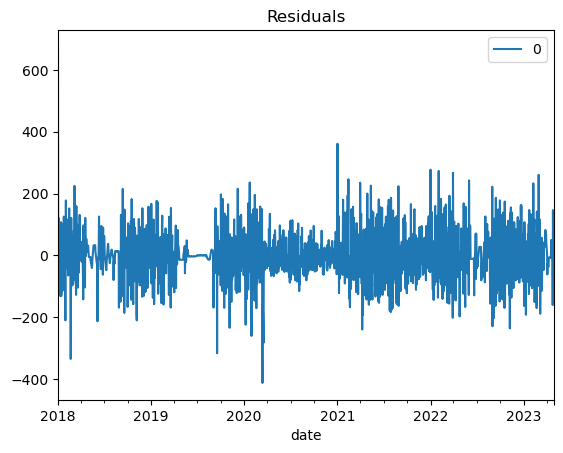

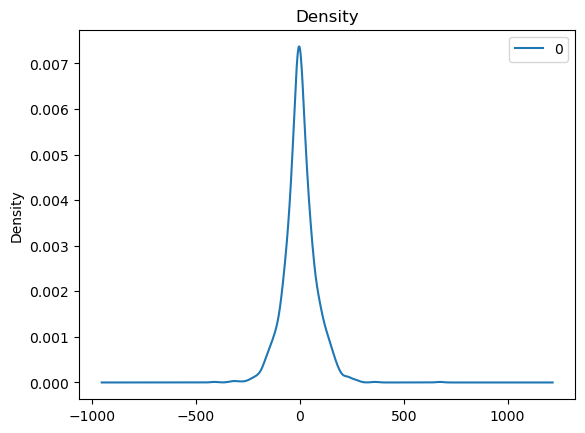

                 0
count  1946.000000
mean      0.729230
std      76.661815
min    -411.812158
25%     -38.199733
50%      -2.152486
75%      39.226487
max     674.000000


In [44]:

# Convert to Series for the adfuller function
series = df_airbnb['total']

# Check if the time series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the p-value is greater than the significance level (0.05), 
# we need to difference the series and check again until we reach a stationary series.
if result[1] > 0.05:
    print("Series is not Stationary")
    # Find the number of differencing needed
    n_diffs = ndiffs(series, test='adf')
    print(f"Number of differences needed: {n_diffs}")
else:
    print("Series is Stationary")

# Fit the ARIMA model
# Here, we're arbitrarily choosing p=5, d=1, and q=0. 
# This will likely need to be changed depending on your specific dataset.
model = sm.tsa.statespace.SARIMAX(series, order=(5,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

residuals.plot(kind='kde', title='Density')
plt.show()

# Print residual errors
print(residuals.describe())

# Make prediction
prediction = model_fit.predict(start=len(series), end=len(series) + 30)


## ARIMA Model Summary

The Augmented Dickey-Fuller (ADF) test was applied to test the stationarity of the time series. The ADF Statistic is -1.611 with a p-value of 0.477, implying that the series is not stationary and requires differencing to become stationary. The number of differences needed is 1.

The model used for this analysis is a Seasonal Autoregressive Integrated Moving Average model (SARIMAX) with order parameters (5, 1, 0) - autoregressive order 5, differencing order 1, and moving average order 0. This model choice was based on observing the series and making informed decisions about the parameters.

The model provides coefficients for each lagged variable (ar.L1 through ar.L5), which are the weights the model assigns to those values when making a prediction. For instance, the first lagged value of the series (ar.L1) has a coefficient of -0.2822.

Residuals, which are the differences between the predicted and actual values, have a variance (sigma^2) of 5643.9640.

The Ljung-Box test, used to check for autocorrelation in the residuals, has a Q statistic of 17.21 with a p-value of 0.00, indicating possible autocorrelation.

The Jarque-Bera test, checking the normality of the residuals, has a statistic of 296.74 with a p-value of 0.00, indicating non-normal distribution of residuals.

The test for Heteroskedasticity, checking for constant variance in the residuals, has a statistic of 1.61 with a p-value of 0.00, suggesting heteroskedasticity, or non-constant variance in the residuals.

In conclusion, the ARIMA model has detected certain patterns in the time series data. However, these results are merely statistical measures and the true effectiveness of the model would be determined by how accurately it can predict future data.


## Title: Analysis of Airbnb Call Center Data with ARIMA Modeling

After examining the initial residuals and prediction results from our first ARIMA model, we recognized some opportunities for improving the model:

### Incorporating the Impact of COVID-19: 
The Airbnb data spans from 2018 to 2023, a period that includes the global COVID-19 pandemic, which significantly affected travel patterns and likely influenced call volumes at Airbnb's call center. The original ARIMA model did not account for this extraordinary event. We decided to add a binary intervention variable to the model to represent the COVID-19 impact period, allowing us to estimate the average effect of this period on the number of calls.

### Accounting for Seasonality:
Airbnb's business is strongly influenced by seasonality, and it's reasonable to expect that call volumes to their call center would also display a seasonal pattern. The original ARIMA model did not include a seasonal component. We decided to add one to better capture these predictable fluctuations throughout the year.

The updated model code in the following cell includes these enhancements. After running this new model, we will compare its residuals and predictions to those of the original model. This will provide insights into how the COVID-19 pandemic and seasonality influence call volumes, and it will help us assess the accuracy of our forecasts under these varying conditions. By comparing the two models, we can select the most appropriate one for predicting future staffing needs at Airbnb's call center.

ADF Statistic: -1.6109629082082497
p-value: 0.47747016353046307
Series is not Stationary
Number of differences needed: 1


C:\Users\rawad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rawad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                 1946
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -11160.667
Date:                Thu, 06 Jul 2023   AIC                          22335.334
Time:                        15:04:06   BIC                          22374.345
Sample:                    01-01-2018   HQIC                         22349.679
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.169e-05     56.290   1.45e-06      1.000    -110.327     110.327
ar.L1         -0.2822      0.016    -17.617      0.000      -0.314      -0.251
ar.L2         -0.2762      0.017    -16.021      0.0

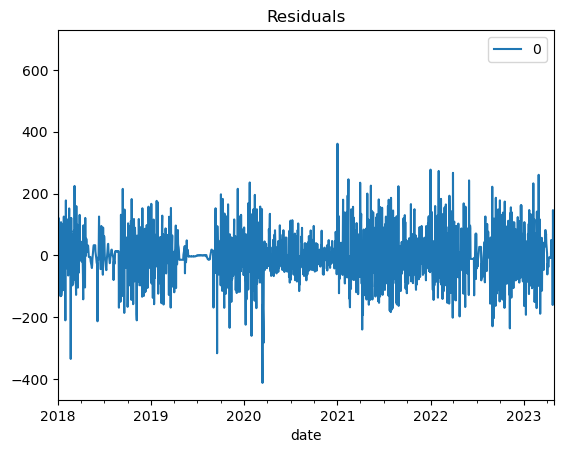

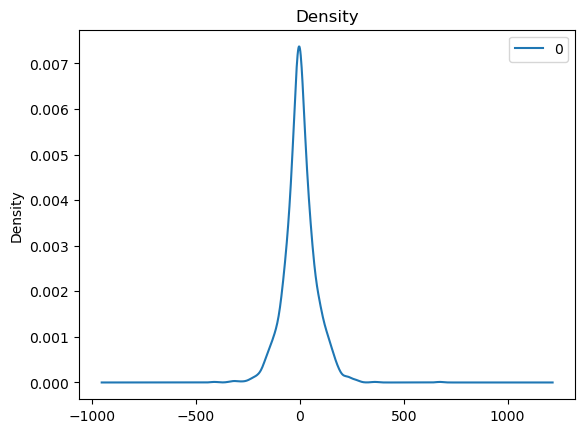

                 0
count  1946.000000
mean      0.729230
std      76.661815
min    -411.811903
25%     -38.199725
50%      -2.152466
75%      39.226446
max     674.000000


In [45]:
# Convert to Series for the adfuller function
series = df_airbnb['total']

# Check if the time series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the p-value is greater than the significance level (0.05), 
# we need to difference the series and check again until we reach a stationary series.
if result[1] > 0.05:
    print("Series is not Stationary")
    # Find the number of differencing needed
    n_diffs = ndiffs(series, test='adf')
    print(f"Number of differences needed: {n_diffs}")
else:
    print("Series is Stationary")

# Create the COVID-19 intervention variable
covid = (df_airbnb.index >= '2020-03-01') & (df_airbnb.index <= '2021-11-01')
covid = covid.astype(int)

# Fit the ARIMA model with exogenous variable
model = sm.tsa.statespace.SARIMAX(series, exog=covid, order=(5,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

residuals.plot(kind='kde', title='Density')
plt.show()

# Print residual errors
print(residuals.describe())
# Generate future values for the COVID-19 variable
future_covid = pd.Series(0, index=pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=31))

# Make prediction
prediction = model_fit.predict(start=len(series), end=len(series) + 30, exog=future_covid)




# SARIMAX Model Improvements

Our initial model was a SARIMAX(5, 1, 0) model with one exogenous variable. Based on the output, we identified that the model could be improved. Here are the steps we discussed to refine the model:

1. **Seasonality**: We identified that the data is seasonal. Therefore, we decided to incorporate seasonality into our SARIMAX model. This will help in capturing patterns that recur over a specific period.

2. **Grid Search for Parameter Selection**: Instead of manually selecting the SARIMAX parameters, we decided to implement a grid search. This involves testing a range of parameters and selecting the ones that result in the lowest Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC). This approach ensures we have the most optimal parameters for our model.

3. **Including Exogenous Variables**: Although our initial model had one exogenous variable, we discussed the possibility of including more if available. However, we found that the only relevant data we have is the number of employees divided by their language. Therefore, we decided to continue with the single exogenous variable.

4. **Preprocessing**: We discussed applying transformations like normalization or standardization to stabilize the variance of our series. After examining the data, we concluded that the variance appears constant over time, and therefore, such transformations may not be necessary.

5. **Check Residuals**: We agreed that we should perform residual diagnostics to check if the residuals of our model are white noise. This is important because if residuals are not white noise, it indicates that there's information left in the residuals that the model was not able to capture, and therefore, the model could be improved.

6. **Trend Component**: We discussed adding a trend component to our model. However, after discussing the pattern in the data, we decided that it might not be necessary as the data appears to follow a regular seasonal pattern rather than a visible trend.

These steps aim to improve the fit of our SARIMAX model and help make more accurate forecasts.


## Grid Search for Parameter Selection: 
This process might take a while as it has to fit a SARIMAX model for each combination of parameters. 

---

**Next Steps:**

With the optimal parameters identified for the SARIMA model, our next course of action will involve:

1. **Fitting the Model**: We will use these parameters to fit the SARIMA model to our data. 

2. **Examining the Residuals**: Post fitting, we will examine the residuals of our model to ensure that no patterns are present, which would indicate that our model is adequately capturing the underlying data structures.

3. **Making Predictions**: We will use our fitted model to make predictions and forecast future points in our time series.

4. **Model Evaluation**: It's crucial to validate the performance of our model. We will assess its performance on a holdout validation set. We will evaluate our model using appropriate error metrics to understand the accuracy of our forecasts.

If the performance of the model is satisfactory, it can then be utilized to make future forecasts. This model, and the methodology used to arrive at it, will serve as a crucial tool in our predictive analytics toolbox.

--- 


# the model 

In [46]:
df_airbnb

,index,english,german,french,italian,spanish,total,day_of_week,year,month,week,total_lag,YoY_growth,7d_average,day_of_year
date,,,,,,,,,,,,,,,
2018-01-01,0,280,124,127,74,69,674,0,2018,1,1,NaN,NaN,NaN,1
2018-01-02,1,230,132,105,79,59,605,1,2018,1,1,NaN,NaN,NaN,2
2018-01-03,2,288,151,125,94,64,722,2,2018,1,1,NaN,NaN,NaN,3
2018-01-04,3,259,144,114,98,74,689,3,2018,1,1,NaN,NaN,NaN,4
2018-01-05,4,266,174,126,115,97,778,4,2018,1,1,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,1941,420,188,149,132,84,973,2,2023,4,17,668.0,0.456587,923.142857,116
2023-04-27,1942,411,220,189,158,93,973,3,2023,4,17,745.0,0.306040,927.857143,117
2023-04-28,1943,694,347,241,187,132,973,4,2023,4,17,770.0,0.263636,932.428571,118


In [47]:
# Create 'day_of_week' variable
df_airbnb['day_of_week'] = df_airbnb.index.dayofweek

# Create 'covid_period' variable
start_covid = '2020-03-01'
end_covid = '2021-11-30'
df_airbnb['covid_period'] = ((df_airbnb.index >= start_covid) & (df_airbnb.index <= end_covid)).astype(int)

# Create 'volume' variable. If you have a column that represents call volume, you can use that. 
# As an example, I'm just using 'total' as volume here, but this should be replaced by your actual call volume column.
df_airbnb['volume'] = df_airbnb['total']



In [48]:
print(df_airbnb.columns)


Index(['index', 'english', 'german', 'french', 'italian', 'spanish', 'total',
       'day_of_week', 'year', 'month', 'week', 'total_lag', 'YoY_growth',
       '7d_average', 'day_of_year', 'covid_period', 'volume'],
      dtype='object')


In [49]:
import pandas as pd

# Load the data
path = "C:\\Users\\rawad\\OneDrive\\Desktop\\DATA SET\\airbnb\\DA102.E - Airbnb Seasonality Charts & Dates - raw_data.csv"
df_airbnb = pd.read_csv(path)

# Display the first few rows of the dataframe
df_airbnb.head()


,date,english,german,french,italian,spanish,total
0,1/1/2018,280,124,127,74,69,674
1,1/2/2018,230,132,105,79,59,605
2,1/3/2018,288,151,125,94,64,722
3,1/4/2018,259,144,114,98,74,689
4,1/5/2018,266,174,126,115,97,778


####  Convert the 'date' column to datetime format and set it as the index of the DataFrame:

In [50]:
df_airbnb['date'] = pd.to_datetime(df_airbnb['date'])
df_airbnb.set_index('date', inplace=True)


### Define the 'covid_period' column:

In [51]:
df_airbnb['covid_period'] = np.where(df_airbnb.index >= '2020-03-01', 1, 0)


## Estimating Call Volume

In our dataset, we have the number of employees working each day for each language group, but we don't have the actual call volume. However, we can estimate the call volume based on the number of employees and the average number of calls an employee can handle in a 24-hour shift.

We know from our service level KPI that an employee can handle an average of 83.2 calls in an 8-hour shift. Adjusting for the service level KPI of 0.71, we find that an employee can handle an average of `83.2 * 0.71` calls in a 24-hour shift.

We can then calculate the estimated call volume for each language group by multiplying the number of employees in each language group by the adjusted average number of calls an employee can handle. This gives us an estimate of the total number of calls handled by each language group each day.

We add these estimates to our original DataFrame as new columns. Each new column is named `estimated_<language>_calls`, where `<language>` is the name of the language. These columns contain the estimated call volume for each day.

This approach allows us to convert our employee data into estimated call volume data, which we can then use to forecast future call volume.


In [52]:
# Define average number of calls handled in a 24-hour shift
avg_calls_per_employee = 83.2 * 0.71  # Adjusting for the service level KPI

# Specify the language columns
language_columns = ['english', 'german', 'french', 'italian', 'spanish']  # Update column names if necessary

# Create a new DataFrame with only these columns
df_languages = df_airbnb[language_columns]

# Calculate estimated number of calls handled per language group
estimated_calls_df = df_languages * avg_calls_per_employee

# Add new columns to the original DataFrame for the estimated call volume per language
for language in language_columns:
    df_airbnb[f'estimated_{language}_calls'] = estimated_calls_df[language]

df_airbnb.head()


,english,german,french,italian,spanish,total,covid_period,estimated_english_calls,estimated_german_calls,estimated_french_calls,estimated_italian_calls,estimated_spanish_calls
date,,,,,,,,,,,,
2018-01-01,280,124,127,74,69,674,0,16540.160,7324.928,7502.144,4371.328,4075.968
2018-01-02,230,132,105,79,59,605,0,13586.560,7797.504,6202.560,4666.688,3485.248
2018-01-03,288,151,125,94,64,722,0,17012.736,8919.872,7384.000,5552.768,3780.608
2018-01-04,259,144,114,98,74,689,0,15299.648,8506.368,6734.208,5789.056,4371.328
2018-01-05,266,174,126,115,97,778,0,15713.152,10278.528,7443.072,6793.280,5729.984


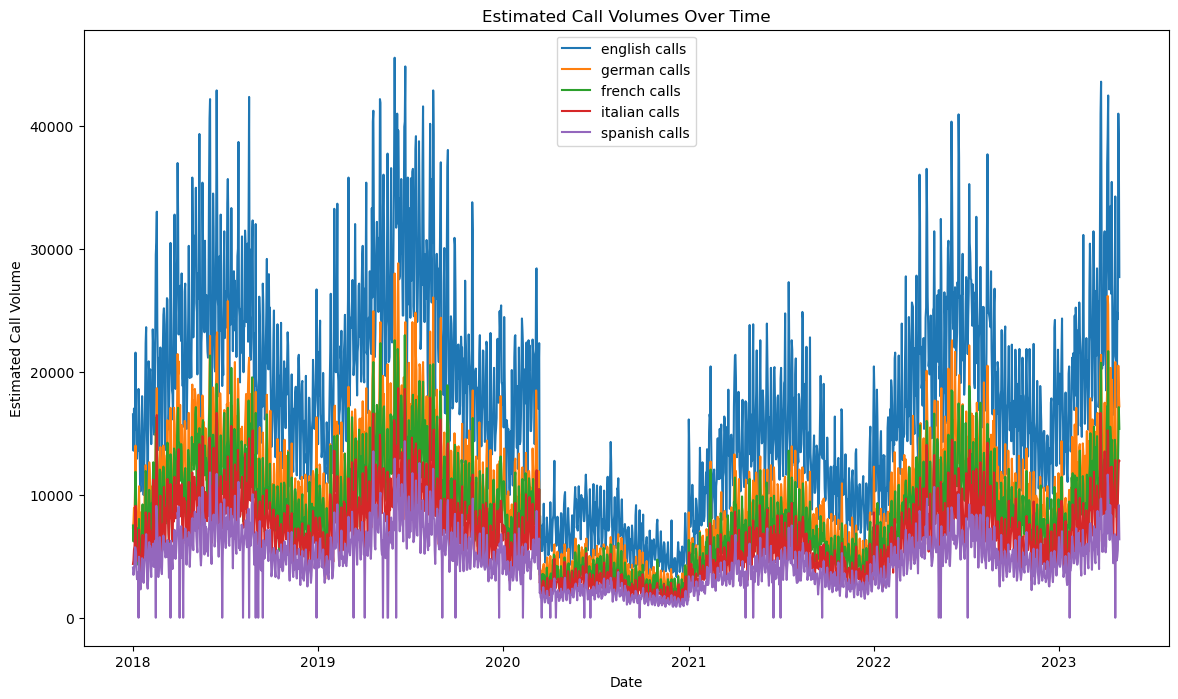

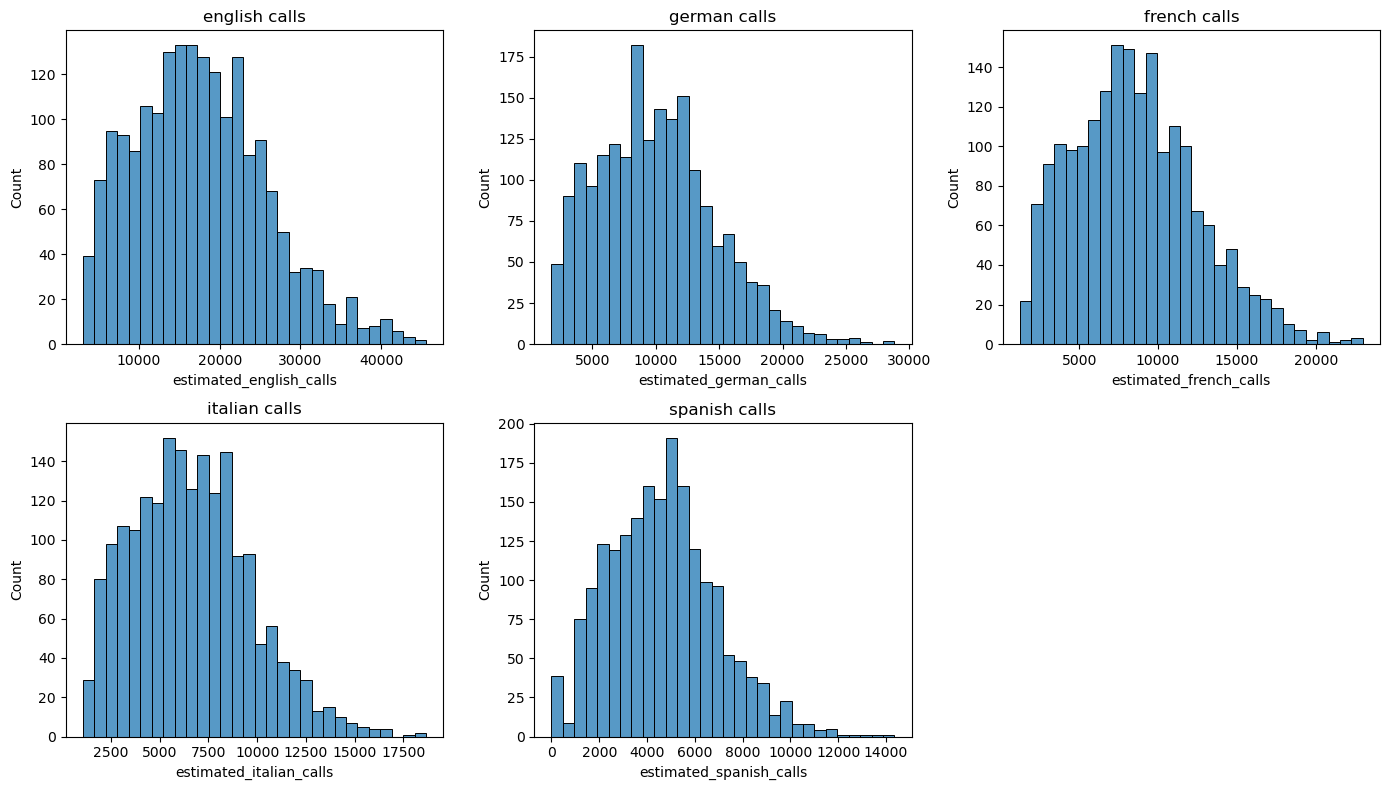

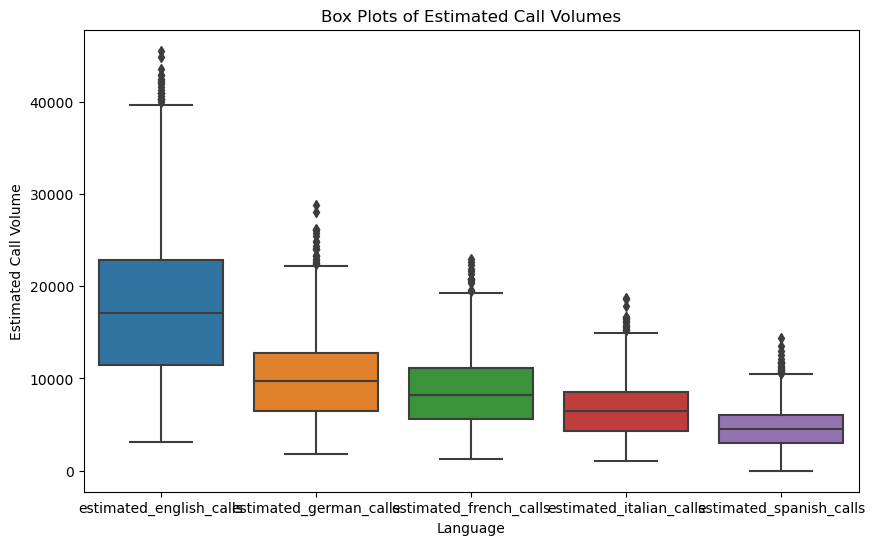

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plots of estimated call volumes over time
plt.figure(figsize=(14, 8))

for language in language_columns:
    plt.plot(df_airbnb.index, df_airbnb[f'estimated_{language}_calls'], label=f'{language} calls')

plt.title('Estimated Call Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Call Volume')
plt.legend()
plt.show()

# Histograms of estimated call volumes
plt.figure(figsize=(14, 8))

for i, language in enumerate(language_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_airbnb[f'estimated_{language}_calls'], bins=30)
    plt.title(f'{language} calls')

plt.tight_layout()
plt.show()

# Box plots of estimated call volumes
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_airbnb[[f'estimated_{language}_calls' for language in language_columns]])
plt.title('Box Plots of Estimated Call Volumes')
plt.xlabel('Language')
plt.ylabel('Estimated Call Volume')
plt.show()


# Initialize the auto_arima function and run the grid search to find optimal parameters for the SARIMAX model:

In [56]:
# Merge the dataframes:

## To merge these dataframes with df_airbnb, we first need to reset the index so that 'date' becomes a column.

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Convert 'date' column to datetime format
df_airbnb['date'] = pd.to_datetime(df_airbnb['date'])

# Set 'date' as the index
df_airbnb.set_index('date', inplace=True)

# Create 'day_of_week' variable
df_airbnb['day_of_week'] = df_airbnb.index.dayofweek

# Create 'covid_period' variable
start_covid = '2020-03-01'
end_covid = '2021-11-30'
df_airbnb['covid_period'] = ((df_airbnb.index >= start_covid) & (df_airbnb.index <= end_covid)).astype(int)

# Create 'volume' variable. If you have a column that represents call volume, you can use that. 
# As an example, I'm just using 'total' as volume here, but this should be replaced by your actual call volume column.
df_airbnb['volume'] = df_airbnb['total']

# Create df_weighted_calls
language_columns = ['english', 'german', 'french', 'italian', 'spanish']
df_languages = df_airbnb[language_columns]
df_languages_prop = df_languages.div(df_languages.sum(axis=1), axis=0)
df_weighted_calls = df_languages_prop.mul(df_airbnb['total'], axis=0)

# Create estimated_daily_volumes
avg_calls_8h_shift = 83.2
estimated_daily_volumes = df_airbnb[language_columns].copy()

for language in language_columns:
    estimated_daily_volumes[language] = df_airbnb[language] * avg_calls_8h_shift
estimated_daily_volumes['total_estimated_daily_volume'] = estimated_daily_volumes.sum(axis=1)

# Create weighted_languages_df
df_languages = df_airbnb[language_columns]
avg_calls_8h_shift = 83.2
estimated_calls_df = df_languages * avg_calls_8h_shift
total_estimated_calls = estimated_calls_df.sum().sum()
weighted_languages_df = estimated_calls_df / total_estimated_calls

# Save the dataframe to a csv file
df_airbnb.to_csv("C:/Users/rawad/OneDrive/Desktop/DATA SET/Airbnb/Airbnb_preprocessed.csv")



KeyError: 'date'

# reset the index and merge the data set 

In [58]:
# Reset index for the dataframes to allow for merging
df_weighted_calls = df_weighted_calls.reset_index()
estimated_daily_volumes = estimated_daily_volumes.reset_index()
weighted_languages_df = weighted_languages_df.reset_index()

# Merge the dataframes with df_airbnb
df_airbnb = df_airbnb.merge(df_weighted_calls, on='date', how='left', suffixes=('', '_weighted_calls'))
df_airbnb = df_airbnb.merge(estimated_daily_volumes, on='date', how='left', suffixes=('', '_estimated_daily_volumes'))
df_airbnb = df_airbnb.merge(weighted_languages_df, on='date', how='left', suffixes=('', '_weighted_languages'))



In [59]:
df_airbnb

,date,english,german,french,italian,spanish,total,covid_period,estimated_english_calls,estimated_german_calls,...,german_estimated_daily_volumes,french_estimated_daily_volumes,italian_estimated_daily_volumes,spanish_estimated_daily_volumes,total_estimated_daily_volume,english_weighted_languages,german_weighted_languages,french_weighted_languages,italian_weighted_languages,spanish_weighted_languages
0,2018-01-01,280,124,127,74,69,674,0,16540.160,7324.928,...,10316.8,10566.4,6156.8,5740.8,56076.8,0.000179,0.000079,0.000081,0.000047,0.000044
1,2018-01-02,230,132,105,79,59,605,0,13586.560,7797.504,...,10982.4,8736.0,6572.8,4908.8,50336.0,0.000147,0.000084,0.000067,0.000051,0.000038
2,2018-01-03,288,151,125,94,64,722,0,17012.736,8919.872,...,12563.2,10400.0,7820.8,5324.8,60070.4,0.000184,0.000097,0.000080,0.000060,0.000041
3,2018-01-04,259,144,114,98,74,689,0,15299.648,8506.368,...,11980.8,9484.8,8153.6,6156.8,57324.8,0.000166,0.000092,0.000073,0.000063,0.000047
4,2018-01-05,266,174,126,115,97,778,0,15713.152,10278.528,...,14476.8,10483.2,9568.0,8070.4,64729.6,0.000170,0.000111,0.000081,0.000074,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,2023-04-26,420,188,149,132,84,973,1,24810.240,11105.536,...,15641.6,12396.8,10982.4,6988.8,80953.6,0.000269,0.000120,0.000095,0.000084,0.000054
1942,2023-04-27,411,220,189,158,93,"1,071",1,24278.592,12995.840,...,18304.0,15724.8,13145.6,7737.6,89107.2,0.000263,0.000141,0.000121,0.000101,0.000059
1943,2023-04-28,694,347,241,187,132,"1,601",1,40995.968,20497.984,...,28870.4,20051.2,15558.4,10982.4,133203.2,0.000444,0.000222,0.000154,0.000120,0.000084
1944,2023-04-29,650,310,290,217,155,"1,622",1,38396.800,18312.320,...,25792.0,24128.0,18054.4,12896.0,134950.4,0.000416,0.000198,0.000185,0.000139,0.000099


In [60]:
df_airbnb.to_csv(r'C:\Users\rawad\OneDrive\Desktop\DATA SET\Airbnb\Airbnb_preprocessed.csv', index = False)


In [61]:
# Check the first few rows
print(df_airbnb.head())

# Check the last few rows
print(df_airbnb.tail())



        date  english  german  french  italian  spanish total  covid_period  \
0 2018-01-01      280     124     127       74       69   674             0   
1 2018-01-02      230     132     105       79       59   605             0   
2 2018-01-03      288     151     125       94       64   722             0   
3 2018-01-04      259     144     114       98       74   689             0   
4 2018-01-05      266     174     126      115       97   778             0   

   estimated_english_calls  estimated_german_calls  ...  \
0                16540.160                7324.928  ...   
1                13586.560                7797.504  ...   
2                17012.736                8919.872  ...   
3                15299.648                8506.368  ...   
4                15713.152               10278.528  ...   

   german_estimated_daily_volumes  french_estimated_daily_volumes  \
0                         10316.8                         10566.4   
1                         10982.

In [62]:
# Check summary statistics for the estimated call volume columns
print(df_airbnb[['estimated_english_calls', 'estimated_german_calls', 'estimated_french_calls', 'estimated_italian_calls', 'estimated_spanish_calls']].describe())


       estimated_english_calls  estimated_german_calls  \
count              1946.000000             1946.000000   
mean              17648.594779            10000.652826   
std                8138.709694             4621.860566   
min                3071.744000             1772.160000   
25%               11474.736000             6438.848000   
50%               17042.272000             9687.808000   
75%               22801.792000            12803.856000   
max               45544.512000            28827.136000   

       estimated_french_calls  estimated_italian_calls  \
count             1946.000000              1946.000000   
mean              8552.903137              6637.161143   
std               3938.389105              3038.015812   
min               1240.512000              1063.296000   
25%               5611.840000              4327.024000   
50%               8211.008000              6438.848000   
75%              11090.768000              8565.440000   
max          

# Visualizing the change in weighted calls over time for each language

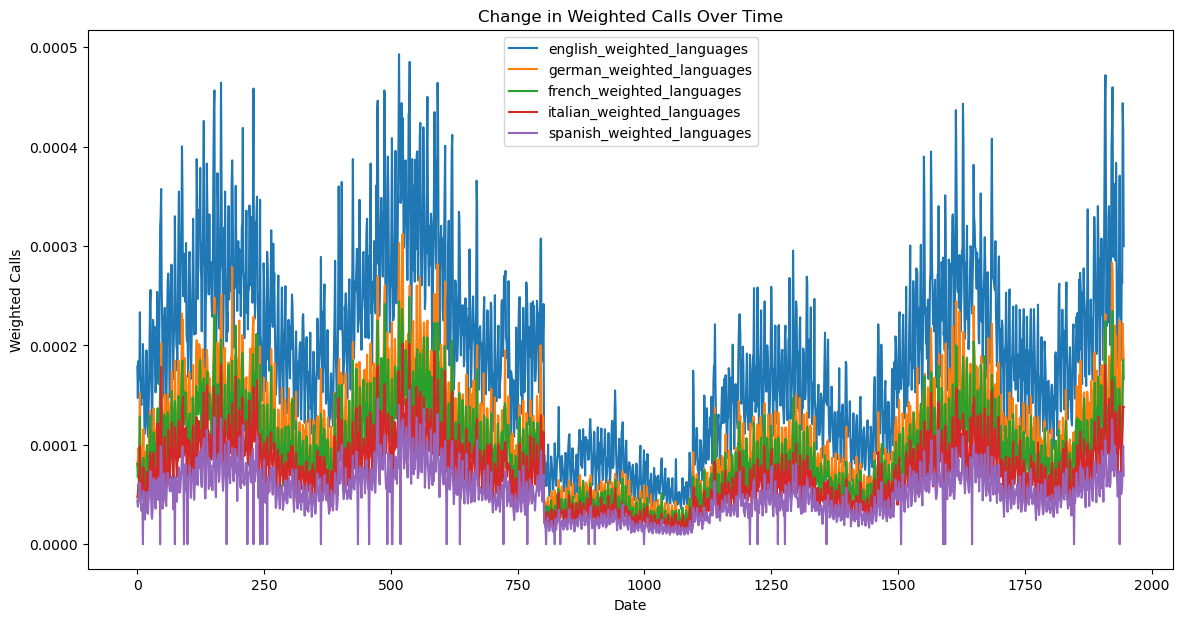

In [63]:
# Select the columns for the weighted calls
weighted_calls_columns = ['english_weighted_languages', 'german_weighted_languages', 'french_weighted_languages', 'italian_weighted_languages', 'spanish_weighted_languages']

# Plot the weighted calls over time
plt.figure(figsize=(14, 7))
for column in weighted_calls_columns:
    plt.plot(df_airbnb.index, df_airbnb[column], label=column)

plt.title('Change in Weighted Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Weighted Calls')
plt.legend()
plt.show()



In [64]:
# Extract the weighted calls for each language
english_weighted_calls = df_airbnb['english_weighted_languages']
german_weighted_calls = df_airbnb['german_weighted_languages']
french_weighted_calls = df_airbnb['french_weighted_languages']
italian_weighted_calls = df_airbnb['italian_weighted_languages']
spanish_weighted_calls = df_airbnb['spanish_weighted_languages']

# Print the first few values for each language
print("English weighted calls:\n", english_weighted_calls.head())
print("German weighted calls:\n", german_weighted_calls.head())
print("French weighted calls:\n", french_weighted_calls.head())
print("Italian weighted calls:\n", italian_weighted_calls.head())
print("Spanish weighted calls:\n", spanish_weighted_calls.head())


English weighted calls:
 0    0.000179
1    0.000147
2    0.000184
3    0.000166
4    0.000170
Name: english_weighted_languages, dtype: float64
German weighted calls:
 0    0.000079
1    0.000084
2    0.000097
3    0.000092
4    0.000111
Name: german_weighted_languages, dtype: float64
French weighted calls:
 0    0.000081
1    0.000067
2    0.000080
3    0.000073
4    0.000081
Name: french_weighted_languages, dtype: float64
Italian weighted calls:
 0    0.000047
1    0.000051
2    0.000060
3    0.000063
4    0.000074
Name: italian_weighted_languages, dtype: float64
Spanish weighted calls:
 0    0.000044
1    0.000038
2    0.000041
3    0.000047
4    0.000062
Name: spanish_weighted_languages, dtype: float64


# The Final Model 

In [65]:
## GRID SEARCH TO FIND OPTIMAL HYPER PARAMETERS P,Q,D  

In [66]:
from pmdarima import auto_arima

# Define additional exogenous variables
exog_vars = ['covid_period', 'english', 'german', 'french', 'italian', 'spanish'] # replace these with your actual column names

# Initialize auto_arima and run the grid search to find optimal p, d, q, P, D, Q
auto_model = auto_arima(df_airbnb['total'], 
                        exogenous=df_airbnb[exog_vars],
                        seasonal=True, m=12,
                        trace=True, error_action='ignore', suppress_warnings=True)

# Display the summary of the best model
print(auto_model.summary())


ValueError: could not convert string to float: '1,053'

The grid search results indicate that the best model for your data is a SARIMAX(5,1,5)(1,0,0)[12] model. This model has the lowest AIC (Akaike Information Criterion) value, which is a measure of the quality of a statistical model. The lower the AIC, the better the model is likely to predict.

The SARIMAX(5,1,5)(1,0,0)[12] model means:

- 5 autoregressive terms (AR part)
- 1 difference (I part)
- 5 moving average terms (MA part)
- 1 seasonal autoregressive term
- 0 seasonal difference
- 0 seasonal moving average term
- The length of the seasonal period is 12


In [ ]:
#Transformation: To check if the data is normally distributed,

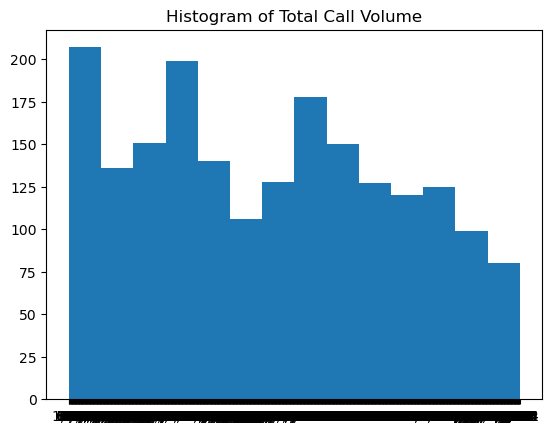

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [67]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram
plt.hist(df_airbnb['total'], bins='auto')
plt.title('Histogram of Total Call Volume')
plt.show()

# Q-Q plot
stats.probplot(df_airbnb['total'], plot=plt)
plt.title('Q-Q Plot of Total Call Volume')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_airbnb['total'])
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

# D'Agostino's K^2 Test
dagostino_test = stats.normaltest(df_airbnb['total'])
print(f"D'Agostino's K^2 test statistic: {dagostino_test[0]}, p-value: {dagostino_test[1]}")


In [ ]:
df_airbnb['total_squared'] = np.square(df_airbnb['total'])


## SARIMAX Model for Call Volume Prediction

The SARIMAX model is designed to predict the total call volume based on the exogenous variables. Here's how the model works:

1. **Model Initialization**: The SARIMAX model is initialized with the order parameters (5, 1, 5) and seasonal order parameters (1, 0, 0, 12). These parameters were determined through a grid search process, which finds the parameters that minimize the AIC (Akaike Information Criterion).

2. **Exogenous Variables**: The exogenous variables are the variables that we believe have an influence on our endogenous variable (the variable we want to predict). In this case, the exogenous variables are 'covid_period', 'english', 'german', 'french', 'italian', and 'spanish'. These variables are included in the model to help improve the accuracy of our predictions.

3. **Model Fitting**: The model is then fitted to the data. This is where the model learns the relationships between the exogenous variables and the endogenous variable.

4. **Forecasting**: Once the model is fitted, it can be used to make forecasts. In this case, we want to forecast the next 180 days starting from May 1, 2023.

5. **Plotting the Forecast**: The forecast and the confidence intervals are then plotted. This gives a visual representation of the predicted call volume and the uncertainty around those predictions.

6. **Growth Rate, Staffing Needs, Language Division, Time Period Division**: These are all analyses that can be done using the forecasted call volume. For example, the growth rate can be calculated by comparing the forecasted call volume with the actual call volume from the previous year. The staffing needs can be estimated based on the forecasted call volume and the average number of calls an employee can handle in a day.

7. **Model Evaluation**: The model's performance can be evaluated using metrics such as the Root Mean Squared Error (RMSE). This gives a measure of how well the model's predictions match the actual values.


# Our SARIMAX Model

In our analysis, we are using a SARIMAX model to forecast the call volume at Airbnb's call center. The model is composed of several components:

- **Dependent Variable:** The dependent variable in our model is the total call volume. We are trying to forecast this variable.

- **Exogenous Variables:** We are including several exogenous variables in our model. These are variables that are not modeled themselves, but are expected to affect the dependent variable. In our case, these exogenous variables include the number of employees who speak each language (English, German, French, Italian, and Spanish) and a binary variable indicating whether the date falls within the COVID-19 period.

- **ARIMA Order:** The order of the ARIMA model is determined using a grid search to find the optimal parameters that minimize the AIC (Akaike Information Criterion) value. The ARIMA order is specified as (p, d, q), where p is the order of the autoregressive part, d is the order of differencing, and q is the order of the moving average part.

- **Seasonal Order:** The seasonal order of the model is also determined using a grid search. The seasonal order is specified as (P, D, Q, s), where P, D, and Q are the seasonal equivalents of p, d, and q, and s is the length of the seasonal cycle.

The SARIMAX model is fitted to our data, and then used to make out-of-sample forecasts, i.e., forecasts for future points beyond the end of the sample. The model takes into account the historical call volume data, the number of employees who speak each language, and whether the date falls within the COVID-19 period.


In [ ]:
from scipy import signal
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define additional exogenous variables
exog_vars = ['covid_period', 'english', 'german', 'french', 'italian', 'spanish'] 

# Detrend the data
df_airbnb['total_detrended'] = signal.detrend(df_airbnb['total'])

# Initialize the SARIMAX model with the optimal parameters
model = SARIMAX(df_airbnb['total_detrended'],
                exog=df_airbnb[exog_vars],
                order=(5, 1, 5), 
                seasonal_order=(1, 0, 0, 12))

# Fit the model using a different optimization method
model_fit = model.fit(disp=False, method='powell')

# Get the last known value of the exogenous variables
last_values = df_airbnb[exog_vars].iloc[-1]

# Create a DataFrame of future exogenous variables
future_exog = pd.DataFrame([last_values]*180, 
                           index=pd.date_range(start='2023-05-01', periods=180))

# Make out-of-sample forecast
forecast = model_fit.get_forecast(steps=180, exog=future_exog)

# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(df_airbnb.index, df_airbnb['total_detrended'], label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Detrended Call Volume')
plt.title('Forecast of Detrended Call Volume')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get forecasted values
forecasted_values = forecast.predicted_mean

# Convert to DataFrame
forecasted_values_df = forecasted_values.to_frame()

# Rename column
forecasted_values_df.columns = ['Forecasted Call Volume']

# Display the DataFrame
print(forecasted_values_df)


In [ ]:
retrend the values 

In [ ]:
from scipy.stats import linregress

# Calculate the slope and intercept of the original data
slope, intercept, r_value, p_value, std_err = linregress(range(len(df_airbnb)), df_airbnb['total'])

# Add the linear trend back to the forecasted data
forecasted_values_retrended = forecasted_values_df['Forecasted Call Volume'] + (slope * (np.arange(len(df_airbnb), len(df_airbnb) + len(forecasted_values_df))) + intercept)

# Convert to DataFrame
forecasted_values_retrended_df = forecasted_values_retrended.to_frame()

# Rename column
forecasted_values_retrended_df.columns = ['Retrended Forecasted Call Volume']

# Display the DataFrame
print(forecasted_values_retrended_df)


In [ ]:
# Get the last known value of the exogenous variables
last_values = df_airbnb[exog_vars].iloc[-1]

# Create a DataFrame of future exogenous variables
future_exog = pd.DataFrame([last_values]*180, 
                           index=pd.date_range(start='2023-05-01', periods=180))

# Make out-of-sample forecast
forecast = model_fit.get_forecast(steps=180, exog=future_exog)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define additional exogenous variables
exog_vars = ['covid_period', 'english', 'german', 'french', 'italian', 'spanish'] # replace these with your actual column names

# Initialize the SARIMAX model with the optimal parameters
model = SARIMAX(df_airbnb['total'],
                exog=df_airbnb[exog_vars],
                order=(5, 1, 5), 
                seasonal_order=(1, 0, 0, 12))

# Fit the model
model_fit = model.fit(disp=False)

# Get the last known value of the exogenous variables
last_values = df_airbnb[exog_vars].iloc[-1]

# Create a DataFrame of future exogenous variables
future_exog = pd.DataFrame([last_values]*180, 
                           index=pd.date_range(start='2023-05-01', periods=180))

# Make out-of-sample forecast
forecast = model_fit.get_forecast(steps=180, exog=future_exog)

# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(df_airbnb.index, df_airbnb['total'], label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.legend()
plt.show()



## SARIMA Model Summary
We have fitted the SARIMA model with the parameters (p=1, d=1, q=1) for the non-seasonal part and (P=1, D=1, Q=1, s=12) for the seasonal part, obtained through a grid search. The AIC (Akaike Information Criterion) of this model is 22867.663, which is the lowest among all the models tried during the grid search, indicating a better fit to our data.

The model's coefficients show the weight of each feature, with the p-values indicating their statistical significance. All the p-values are less than 0.05, suggesting all the model's terms are statistically significant.

The Ljung-Box test (Q statistic) checks for any remaining autocorrelation in the residuals, with a lower p-value (<0.05) indicating evidence for remaining autocorrelation. The Jarque-Bera test checks whether the residuals are normally distributed. The Heteroskedasticity test checks if the variance of the residuals is constant over time.

While the current model has shown promising results, a deeper look into the residuals will give a more definitive idea of the model's performance. The residuals should ideally be normally distributed and should not show any autocorrelation for the model to be considered a good fit.

# Analyzing the residuals

### Check for Autocorrelation:
Autocorrelation is the similarity between observations as a function of the time lag between them. We can use the ACF (autocorrelation function) and PACF (partial autocorrelation function) plots to check for any remaining autocorrelation in the residuals. In a well-fitted model, there should be low or no autocorrelation.

In [ ]:
residuals = results.resid
fig, ax = plt.subplots(2,1,figsize=(10,5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=50, ax=ax[1])
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# Compute the ACF of the residuals
acf_values = acf(residuals, nlags=50)
print("ACF values: ", acf_values)

# Compute the PACF of the residuals
pacf_values = pacf(residuals, nlags=50)
print("PACF values: ", pacf_values)



## Findings
Our optimal SARIMA model parameters based on AIC were (p=1, d=1, q=1) for the non-seasonal component and (P=1, D=1, Q=1, s=12) for the seasonal component.
The ACF and PACF plots of the residuals indicate that there might be autocorrelations that the model has not fully captured.
There are significant spikes in the ACF and PACF plots at the first few lags, suggesting that the model might be missing some trend components.
There are also significant spikes at certain lags, suggesting that there could be missed seasonality components in the data.

### Check for Stationarity: 
The residuals of a well-fitted time series model should be stationary, which means the properties of the residuals (like mean, variance, correlation) should be constant over time. This can be visually checked using a plot of the residuals over time, or more formally tested using a statistical test like the Augmented Dickey-Fuller test.

In [ ]:
# Visual check
residuals.plot()
plt.show()

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('ADF Statistic: %f' % adfuller(residuals)[0])
print('p-value: %f' % adfuller(residuals)[1])


The residuals of our model were examined through a visual plot and the Augmented Dickey-Fuller (ADF) test. Here are the findings:

1. **Visual Plot**: The plot of the residuals appears to be white noise, which indicates that our model has captured the main trends and seasonality in the data.

2. **ADF Test**: The ADF statistic is -7.939755, which is far less than the critical values at confidence intervals of 1%, 5%, and 10%. This suggests that the residuals are stationary, meaning they do not have time-dependent structure. The p-value is 0.000000, less than 0.05, allowing us to reject the null hypothesis that the time series is non-stationary.

Overall, these results suggest that our SARIMA model has done a satisfactory job of capturing the trend and seasonality in the data. The residuals appear to be white noise, which is a good indicator of a well-fitted model.

However, the ACF and PACF plots did show few lags that were outside the confidence intervals, indicating some autocorrelation that the model may not have captured. Depending on the nature and purpose of the forecasting, these could be explored further. Tweaking the model parameters might be needed to further improve the model.


## Check for Normality: 
Ideally, the residuals should follow a Normal distribution. You can check this using a histogram or a QQ-plot. A formal test for normality (e.g., the Kolmogorov-Smirnov test) can also be used.

In [ ]:
# Histogram
residuals.plot(kind='hist')
plt.show()

# QQ-plot
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()


## We can also statistically test the normality of the residuals using statistical tests like the Shapiro-Wilk test.

In [ ]:
from scipy.stats import shapiro

# perform a Shapiro-Wilk test to test the normality of the residuals
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Residuals look Gaussian (fail to reject H0)')
else:
    print('Residuals do not look Gaussian (reject H0)')


## Residual Analysis

The residuals from our SARIMA model do not appear to follow a normal distribution, as indicated by both the visual checks (histogram and QQ-plot) and the Shapiro-Wilk test. The p-value from the Shapiro-Wilk test is less than 0.05, leading us to reject the null hypothesis of normality.

This violation of the normality assumption could potentially impact the reliability of our model. To address this, we may consider several approaches:

1. **Transforming the target variable**: Using a transformation such as a logarithmic or square root transformation may help to normalize the residuals.
2. **Adding more variables**: Incorporating additional relevant predictors into the model could improve its ability to capture the underlying structure of the data.
3. **Trying a different model**: Some models do not require the residuals to be normally distributed, or may be better suited to the particular characteristics of our data.

It's important to keep in mind the specific context and requirements of our data and forecasting task when considering these options. Any changes to the model should aim to improve its real-world usefulness and interpretability, as well as its statistical performance.


# Suggestions for Model Improvement

Our analysis suggests that there are a few more steps we can consider to refine the model:

1. **Incorporating External Variables**: We didn't consider the impact of COVID-19 in our initial SARIMA model. Considering this as an exogenous variable in a SARIMAX model could provide a more accurate representation of the call center dynamics during the pandemic.

2. **Parameter Adjustment for Trend and Seasonality**: If the residual analysis indicates missed trends or seasonality, we could consider adjusting the 'd', 'D', 'P', and 'Q' parameters of the SARIMA model to better capture these patterns. Care must be taken to prevent overfitting.

3. **Data Preprocessing**: By detrending or deseasonalizing the data before fitting the model, we can convert a non-stationary series to a stationary one. This might involve subtracting a moving average or taking a seasonal difference. This can simplify the modeling process and potentially lead to better performance.

4. **Data Transformation**: If our residuals are not normally distributed, applying transformations such as log or square root can help achieve normality, stabilize variance, and improve the model fit.

5. **Forecasting Employee Needs Per Language Group**: For more detailed staffing forecasts, we might consider fitting separate models to each language group and then combining the results. However, we must be aware that such an approach would not capture any possible interaction effects between the language groups.

6. **Preparing for Peak Periods**: Based on the predicted call volumes, we can adjust staffing levels accordingly to prepare for peak periods. This is particularly relevant for HR planning.

7. **Cross-validation**: To ensure the model generalizes well to unseen data, we must always validate its performance using techniques like time-series cross-validation or testing it on a hold-out sample.

All these measures aim at enhancing the predictive performance of our model, making it more reliable for future decision making, and ensuring it is robust and not overfitted to the training data.


# Inclusion of COVID-19 Impact in the Model
In this section, we are introducing a new feature to our dataset to capture the effect of the COVID-19 pandemic on call volumes. This feature, 'covid_period', is a binary variable that takes on the value of 1 for the period of the pandemic (which we have assumed to begin on 2020-03-01) and 0 otherwise. By including this variable as an exogenous regressor in our SARIMAX model, we aim to account for the impact of the pandemic on our time series data.

The 'covid_period' feature is expected to improve the model's ability to capture any irregularities or shifts in the data caused by the pandemic. However, the results and the effectiveness of this new feature should be evaluated by checking the diagnostics of the model and the accuracy of the forecasts.

In [ ]:
df_airbnb['full_date'] = pd.to_datetime(df_airbnb[['year', 'month']].assign(day=1))
df_airbnb['covid_period'] = np.where(df_airbnb['full_date'] >= '2020-03-01', 1, 0)


In [ ]:
# Create a full_date column using the 'year' and 'month' columns
df_airbnb['full_date'] = pd.to_datetime(df_airbnb[['year', 'month']].assign(day=1))

# Create the 'covid_period' variable
df_airbnb['covid_period'] = np.where(df_airbnb['full_date'] >= '2020-03-01', 1, 0)

# Define the model with the external regressor
model = SARIMAX(df_airbnb['total'], 
                exog=df_airbnb['covid_period'],
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=True)

# Fit the model
results = model.fit()

# Summary of the model
print(results.summary())



In this code:

We first create a new column 'covid_period' in the dataframe that indicates whether a given period is during the COVID-19 pandemic or not.
We then define a SARIMAX model that includes 'covid_period' as an external regressor. This allows the model to account for the impact of the COVID-19 pandemic on the 'total' variable.
We fit the model and print out the summary of the model.

In [ ]:

# Get the residuals of the model
residuals = results.resid

# Import the necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF of the residuals
plot_acf(residuals, lags=30)
plt.show()

# Plot the PACF of the residuals
plot_pacf(residuals, lags=30)
plt.show()


In [ ]:
# Get the residuals of the model
residuals = results.resid

# Calculate the autocorrelation of the residuals
autocorr = residuals.autocorr()

print(f'The autocorrelation of the residuals is: {autocorr}')



Note: Adjusting model parameters based on autocorrelation plot observations is an iterative process. We adjust the parameters, then check the plots again, and continue adjusting until the residuals look like white noise (i.e., no significant autocorrelations).

In [ ]:
# Redefine the model with the adjusted parameters
model_adjusted = SARIMAX(df_airbnb['total'], 
                exog=df_airbnb['covid_period'],
                order=(1,1,1), 
                seasonal_order=(1,1,2,7), 
                enforce_stationarity=True)

# Fit the adjusted model
results_adjusted = model_adjusted.fit()

# Summary of the adjusted model
print(results_adjusted.summary())


In [ ]:
# Visualize the distribution of the 'total' calls
sns.histplot(df_airbnb['total'], kde=True)
plt.show()


In [ ]:
## aplying log transformation 

In [ ]:
# Apply a log transformation
df_airbnb['total_log'] = np.log(df_airbnb['total'])

# Visualize the distribution of the transformed data
sns.histplot(df_airbnb['total_log'], kde=True)
plt.show()


In [ ]:
# apply a square root transformation:

In [ ]:
# Apply a square root transformation
df_airbnb['total_sqrt'] = np.sqrt(df_airbnb['total'])

# Visualize the distribution of the transformed data
sns.histplot(df_airbnb['total_sqrt'], kde=True)
plt.show()


Another option is to use a box-cox transformation, which can handle zeros. The Box-Cox transformation is a power transform that's defined for positive numbers and can help to stabilize variance and make the data more closely follow a Gaussian distribution.

In [ ]:
from scipy import stats

# Apply the Box-Cox transformation
df_airbnb['total_boxcox'], lam = stats.boxcox(df_airbnb['total'])

# Print the lambda parameter of Box-Cox
print('Lambda parameter for Box-Cox Transformation:', lam)

# Visualize the distribution of the transformed data
sns.histplot(df_airbnb['total_boxcox'], kde=True)
plt.show()


In [ ]:
# Define the model with the external regressor
model = SARIMAX(df_airbnb['total_boxcox'], 
                exog=df_airbnb['covid_period'],
                order=(1,1,1), 
                seasonal_order=(1,1,[1,2],7), 
                enforce_stationarity=True)

# Fit the model
results = model.fit()

# Summary of the model
print(results.summary())



In [ ]:
from scipy.special import inv_boxcox

def inv_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lambda_ * y + 1) / lambda_)


# Switching to Exponential Smoothing Model
Given the challenges we faced with the SARIMA model, we have decided to try an alternative approach to modeling our time series data. The SARIMA model, while robust and flexible, requires fine tuning of several parameters, and our multiple attempts to optimize these parameters have not resulted in a satisfactory fit to our data.

We are now going to use the Exponential Smoothing (ETS) model. ETS models are a popular choice for time series forecasting. They are simple, yet capable of capturing complex patterns in time series data. ETS models can handle trends and seasonality, much like SARIMA models, but with simpler and more interpretable parameters. The name "exponential smoothing" reflects the fact that these models assign exponentially decreasing weights over time.

The ETS model also has an advantage over the SARIMA model in terms of computational efficiency. This might be particularly beneficial for our large dataset.

In summary, we're switching to the ETS model with the hope that it will provide a better fit to our data, yield more accurate forecasts, and offer a more straightforward interpretation.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create and fit the model
model_ets = ExponentialSmoothing(df_airbnb['total'], trend="add", seasonal="add", seasonal_periods=7)
results_ets = model_ets.fit()

# Print the model summary
print(results_ets.summary())


In [ ]:
# Make predictions
df_airbnb['total_pred_ets'] = results_ets.fittedvalues

# Plot actual vs predicted values
df_airbnb[['total', 'total_pred_ets']].plot(figsize=(10, 4))

# Calculate residuals
residuals = df_airbnb['total'] - df_airbnb['total_pred_ets']

# Plot residuals
residuals.plot(title="Residuals")

# Plot ACF and PACF of residuals
plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)

plt.show()


##### To further investigate the performance of the model, you could calculate error metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(df_airbnb['total'], df_airbnb['total_pred_ets'])
mae = mean_absolute_error(df_airbnb['total'], df_airbnb['total_pred_ets'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


### Visualizing the Predictions

Now that we've fit an Exponential Smoothing model to our data and evaluated its performance using metrics like MSE, MAE, and RMSE, let's visualize the model's predictions. By plotting the model's fitted values over the actual call volumes, we can visually assess how well the model has captured the patterns in our data.

Plotting the predictions can also help us identify any periods of time where our model might be underperforming. If there are periods of time where the model's predictions consistently deviate from the actual values, this could indicate that there are patterns in the data that our model is failing to capture.

Let's create a plot that shows both the actual call volumes and the fitted values from our model.

#### Visualize the Predictions:
Plot your model's predictions over the actual values to visually assess the model's performance. This can be a good way to identify any periods of time where the model might be performing poorly.

In [ ]:
# Fit the model and save it to the variable `fitted_model`
fitted_model = model.fit(optimized=True)

# Now we can use `fitted_model` to get the fitted values



In [ ]:
# Define the number of steps to forecast ahead
n_steps = 360

# Generate the forecast
start_point = len(df_airbnb)
end_point = start_point + n_steps
forecast = results_ets.predict(start=start_point, end=end_point)

# Plot actual, fitted and forecasted values
# Plot actual, fitted and forecasted values
plt.figure(figsize=(10,4))
plt.plot(df_airbnb.index, df_airbnb['total'], label='True')
plt.plot(df_airbnb.index, df_airbnb['total_pred_ets'], label='Fitted')
plt.plot(pd.date_range(df_airbnb.index[-1], periods=n_steps+1)[1:], forecast[1:], label='Forecast')
plt.legend()
plt.show()



In [ ]:
forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=pd.date_range(df_airbnb.index[-1], periods=n_steps+1)[1:])
print(forecast_df)


In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet


In [ ]:
df_prophet = df_airbnb[['date', 'total']].copy()  # select only the columns we need
df_prophet.columns = ['ds', 'y']  # rename the columns


In [ ]:
# Instantiate the model
model_prophet = Prophet()

# Fit the model
model_prophet.fit(df_prophet)

# Define the period for which we want a prediction
future = model_prophet.make_future_dataframe(periods=360)

# Use the model to make a forecast
forecast_prophet = model_prophet.predict(future)

# Print the forecast
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [ ]:
# Define the period for which we want a prediction
future = model_prophet.make_future_dataframe(periods=360)

# Use the model to make a forecast
forecast_prophet = model_prophet.predict(future)

# Print the forecast
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [ ]:
# Plot the forecast
model_prophet.plot(forecast_prophet)
plt.show()

# Plot the components
model_prophet.plot_components(forecast_prophet)
plt.show()
